In [2]:
#	№    For copying
import os
import pandas as pd
import seaborn as sns
import geopandas as gpd
from random import randint
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from draw import Histogram, Piechart, Map, StackedBar
from helper import CountryHelper,JobHelper, SexHelper

models = ["ChatGPT","Claude","DeepSeek","Gemini"]
case_studies = ["Career Development","Family Health","Financial Literacy","Media Literacy"]
dataset = "Financial Literacy"

dfs = {
    case_study: {
        model:pd.read_csv(os.path.join("Case Studies",case_study,f'{model}.csv'))
        for model in models
    }
    for case_study in case_studies
}

# dfs = {}
# for case_study in case_studies:
#     these_dfs = {
#         model:pd.read_excel(
#             os.path.join("Case Studies",case_study,f"{case_study}.xlsx"),
#             sheet_name=model,
#             nrows=51, #Header (1) + Data (50)
#             header=[1,2] if case_study in ['Career Development','Family Health'] else [1]
#         )
#         for model in models
#     }
    
#     for df in these_dfs.values():
#         df.columns = [
#             ' '.join(map(str,[    
#                 item for item in [(col,),col][type(col) is tuple] #Ensure col is a tuple
#                 if 'unnamed' not in str(item).lower() #Remove unnamed columns
#             ])).strip()
#             for col in df.columns
#         ]
#         df['Batch'] = df['Batch'].ffill().astype(int)
        
#     these_dfs = {df_i:df.drop(columns=[''], errors='ignore') for df_i,df in these_dfs.items()}
#     dfs[case_study] = these_dfs

# for case_study in dfs:
#     for model_df in dfs[case_study]:
#         dfs[case_study][model_df].to_csv(os.path.join("Case Studies",case_study,f"{model_df}.csv"),index=False)

data_folder = os.path.join('Case Studies', dataset, 'data')
if not os.path.exists(data_folder):
    os.makedirs(data_folder)
        
chizu = Map(models)
piechart = Piechart(models)
stackedBar = StackedBar(models)
histogram = Histogram(models)

sexHelper = SexHelper()
countryHelper = CountryHelper()
jobHelper = JobHelper()

C:\Users\Gabriel_Freeze\AppData\Local\Temp\ipykernel_10180\746758281.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(avg_age_male, shade=True, label='Male', color='blue')
C:\Users\Gabriel_Freeze\AppData\Local\Temp\ipykernel_10180\746758281.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(avg_age_female, shade=True, label='Female', color='pink')


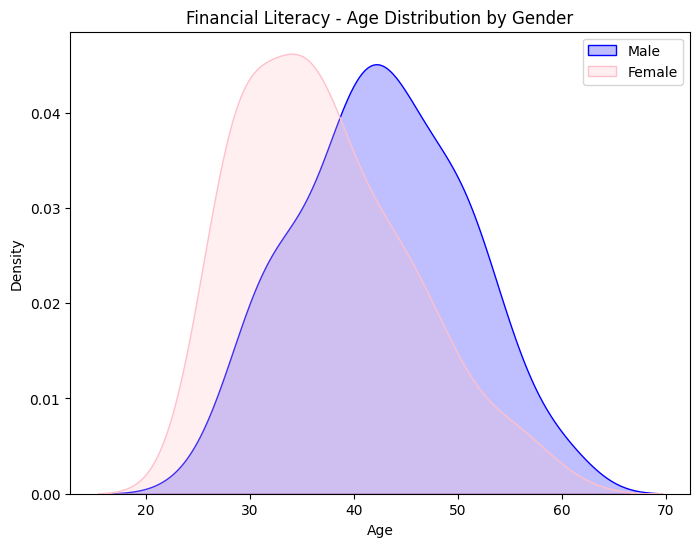

In [7]:
df = pd.concat([dfs[dataset][model].assign(model=model) for model in models], ignore_index=True)
df['Sex'] = df['Sex'].apply(sexHelper.sex2standard)
avg_age_male   = df[df['Sex'] == 'Male']['Age']  
avg_age_female = df[df['Sex'] == 'Female']['Age']

plt.figure(figsize=(8, 6))
sns.kdeplot(avg_age_male, shade=True, label='Male', color='blue')
sns.kdeplot(avg_age_female, shade=True, label='Female', color='pink')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title(f'{dataset} - Age Distribution by Gender')
plt.legend()
plt.show()

In [18]:
mean_ages = df[df['Sex'].isin(['Male', 'Female'])].groupby(['model', 'Sex'])['Age'].mean().unstack()[['Male', 'Female']].apply(lambda x: round(x,0))
print(mean_ages)

Sex       Male  Female
model                 
ChatGPT   44.0    38.0
Claude    43.0    37.0
DeepSeek  42.0    38.0
Gemini    42.0    36.0


## Financial Literacy

### Emigrating Countries (Map)

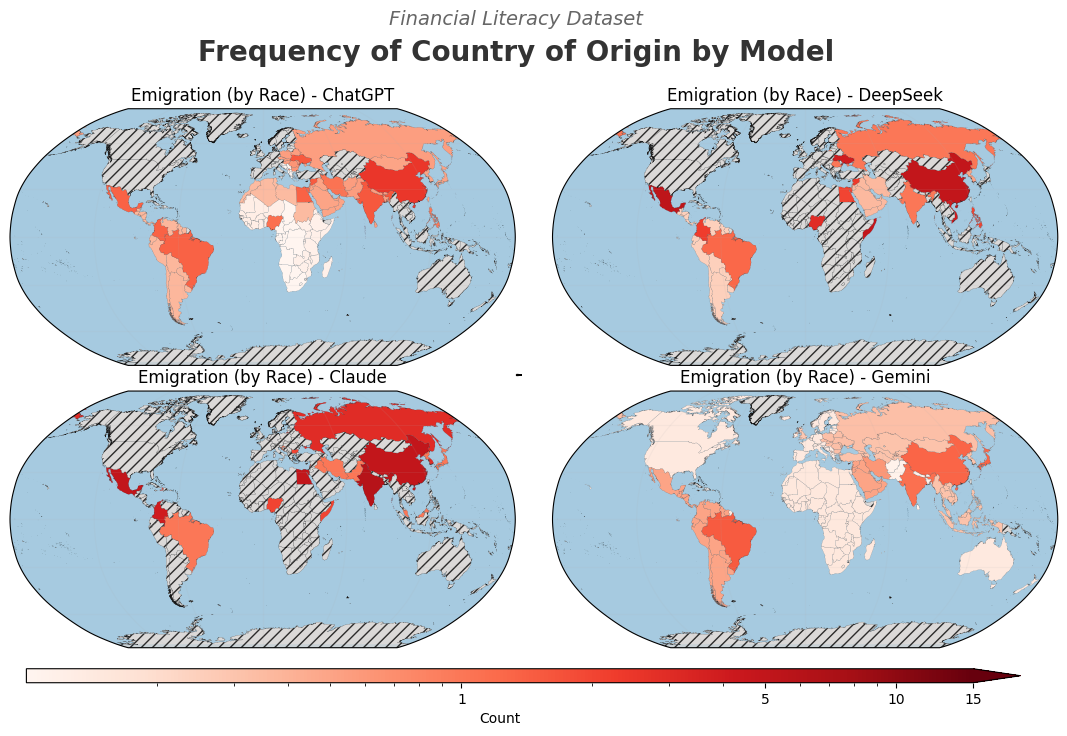

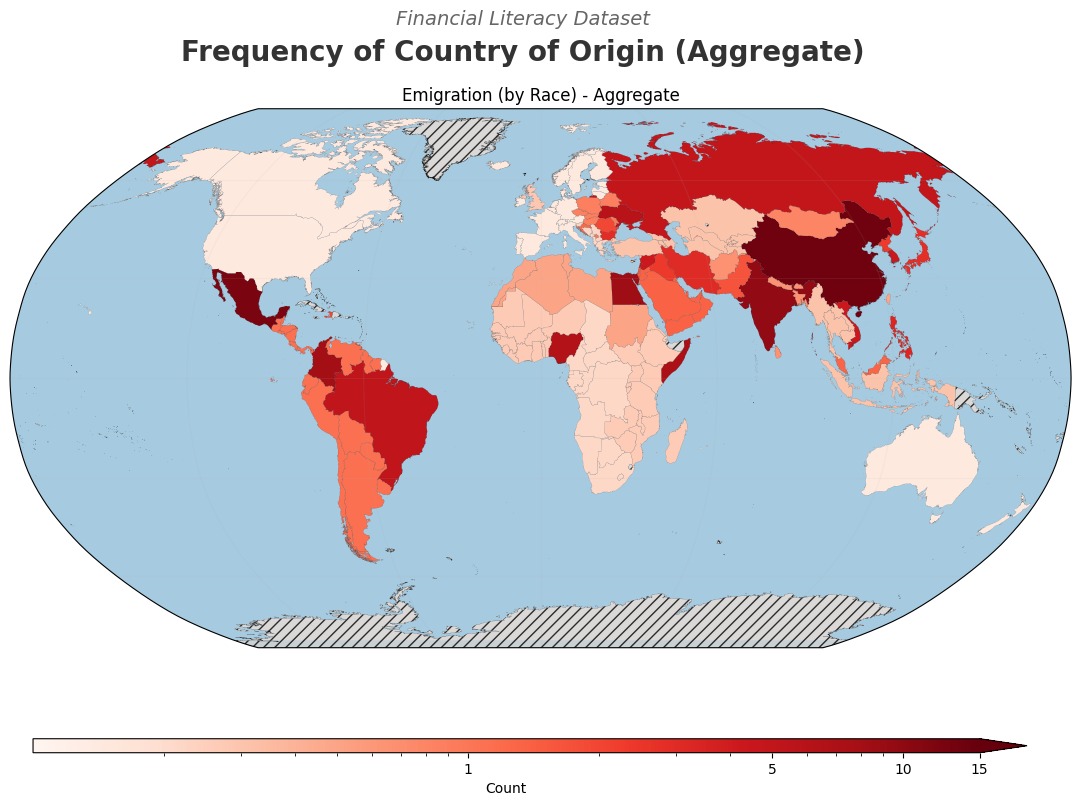

In [4]:
share_legend = True

fig, axs = plt.subplots(2, 2, figsize=(14, 7), squeeze=False,
                        subplot_kw={'projection': ccrs.Robinson()},
                        gridspec_kw={'wspace': 0, 'hspace': 0.1})

for i,model in enumerate(['ChatGPT','Claude','DeepSeek','Gemini']):

    df = dfs[dataset][model]
    df['Country of Residence'] = df['Country of Residence'].apply(countryHelper.fix_country_naming)
    df['Country of Origin'] = df['Race'].apply(countryHelper.race2country)
    
    axs[i%2][i//2] = chizu.draw(
        df=df,x='Country of Origin',
        title=f'Emigration (by Race) - {model}',
        cmap='Reds', ax=axs[i%2][i//2],step=5,
        low_poly=False, log=True,
        max_count=15, legend=[0,0,share_legend,0][i],
    )
    
fig.suptitle('Frequency of Country of Origin by Model', 
             fontsize=20, y=0.98, fontweight='bold', color='#333333')
fig.text(0.5, 1, f'{dataset} Dataset', 
         ha='center', fontsize=14, color='#666666', style='italic')
plt.savefig(os.path.join('Case Studies',dataset,'data',f"Emigrating Countries (Map)"), dpi=300, bbox_inches='tight')
plt.show()

df = pd.concat([dfs[dataset][model] for model in models], ignore_index=True)
df['Country of Residence'] = df['Country of Residence'].apply(countryHelper.fix_country_naming)
df['Country of Origin'] = df['Race'].apply(countryHelper.race2country)

fig, ax = plt.subplots(figsize=(14, 7), subplot_kw={'projection': ccrs.Robinson()})
ax = chizu.draw(
    df=df,x='Country of Origin',
    title=f'Emigration (by Race) - Aggregate',
    cmap='Reds', ax=ax, step=5,
    low_poly=False, log=True,
    max_count=15, legend=True,
    legend_loc=[0,-0.1,0,0]
)

fig.suptitle('Frequency of Country of Origin (Aggregate)', 
             fontsize=20, y=0.98, fontweight='bold', color='#333333')
fig.text(0.5, 1, f'{dataset} Dataset', 
         ha='center', fontsize=14, color='#666666', style='italic')

plt.savefig(os.path.join('Case Studies',dataset,'data',f"Emigrating Countries (Map) - Aggregate"), dpi=300, bbox_inches='tight')
plt.show()

### Emigrating Countries (Histogram)

c:\Users\Owner\Desktop\gender\draw.py:259: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([
c:\Users\Owner\Desktop\gender\draw.py:259: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([
c:\Users\Owner\Desktop\gender\draw.py:259: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([
c:\Users\Owner\Desktop\gender\draw.py:259: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([
c:\Users\Owner\Desktop\gender\draw.py:311: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.04, 1, 0.94])


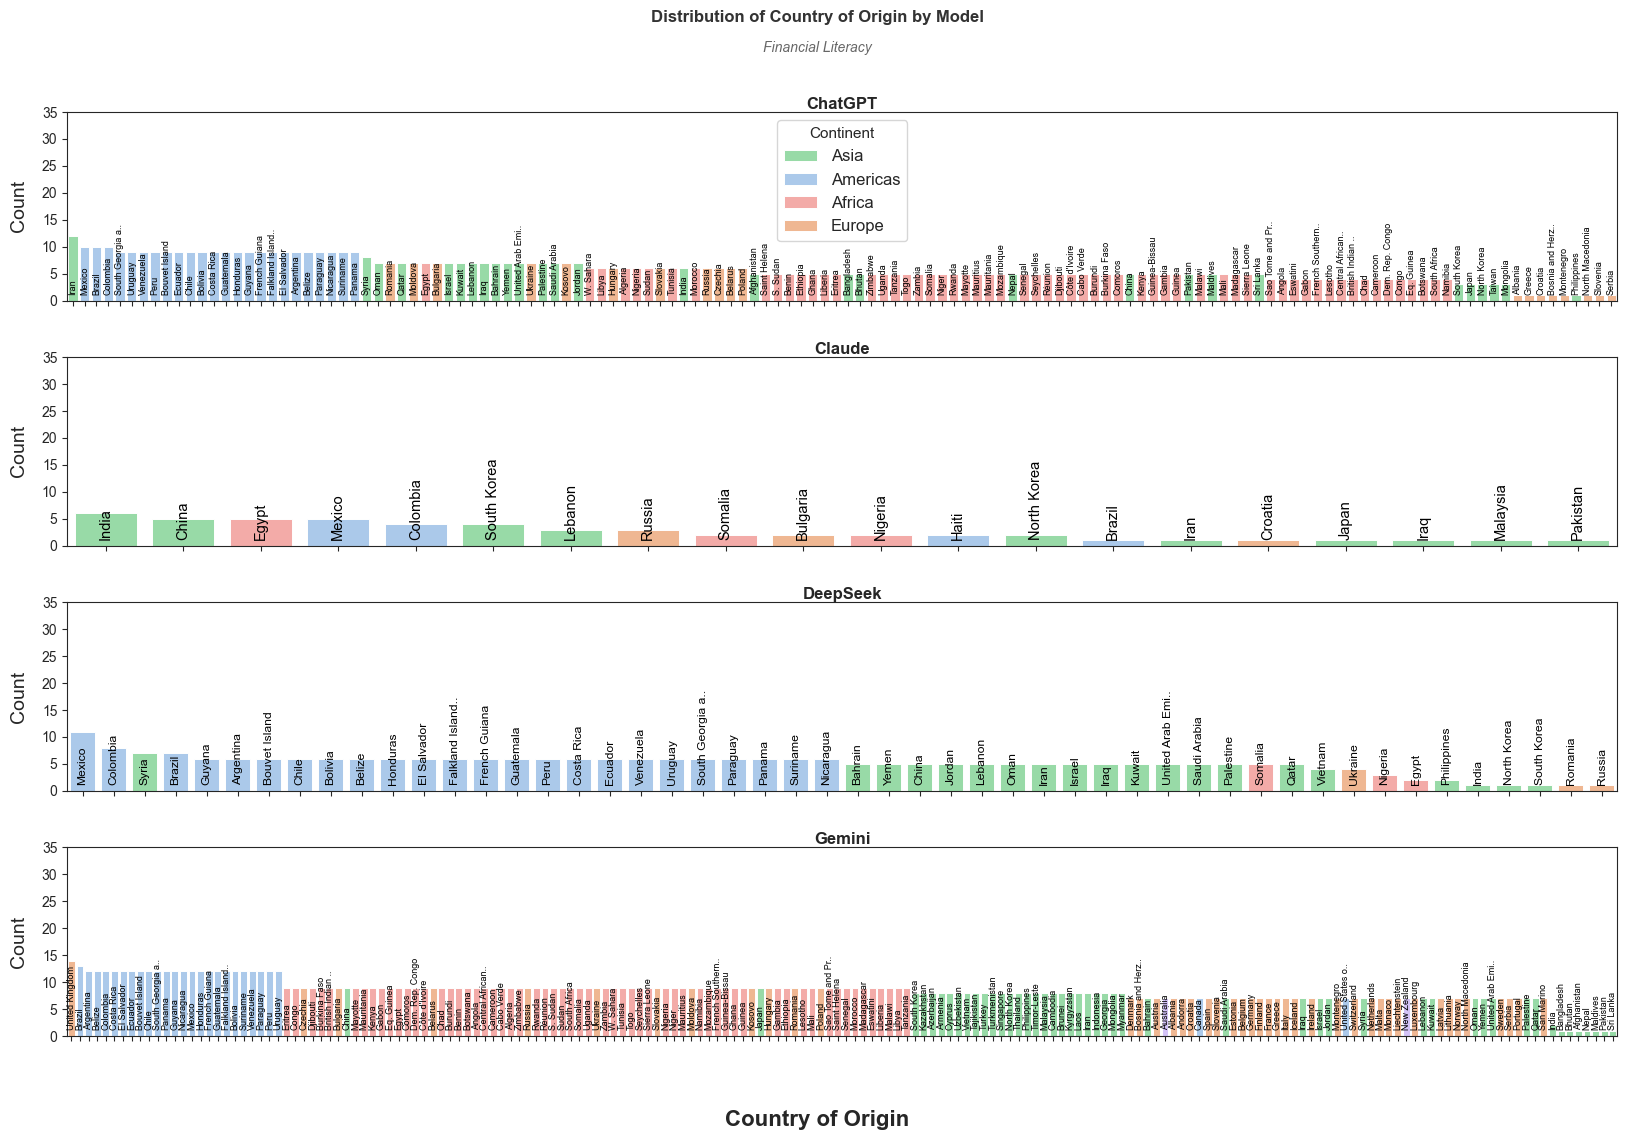

In [3]:
df = pd.concat([dfs[dataset][model].assign(model=model) for model in models], ignore_index=True)
df['Country of Origin'] = df['Race'].apply(countryHelper.race2country).apply(countryHelper.fix_country_naming)
df = df[["Country of Origin",'model']]
df = df.explode('Country of Origin')
df['Region'] = df['Country of Origin'].apply(
    lambda country: countryHelper.country2region(country)['subregion']
)
df['Continent'] = df['Country of Origin'].apply(
    lambda country: countryHelper.country2region(country)['region']
)

#TODO: If hue is continet/region, use a map instead of a legend to show the colors
plt = histogram.draw(
    df=df,x='Country of Origin',
    hue='Continent', bar_labels=False,
    dataset=dataset, ylim=35,ystep=5,
    aggregate=False,long_layout=True,
    xtick_label_max_len=15,
    figsize=(20,12)
)
plt.savefig(os.path.join('Case Studies',dataset,'data',f"Emigrating Countries (Histogram)"), dpi=300, bbox_inches='tight')
plt.show()

### Gender Countries (Map)

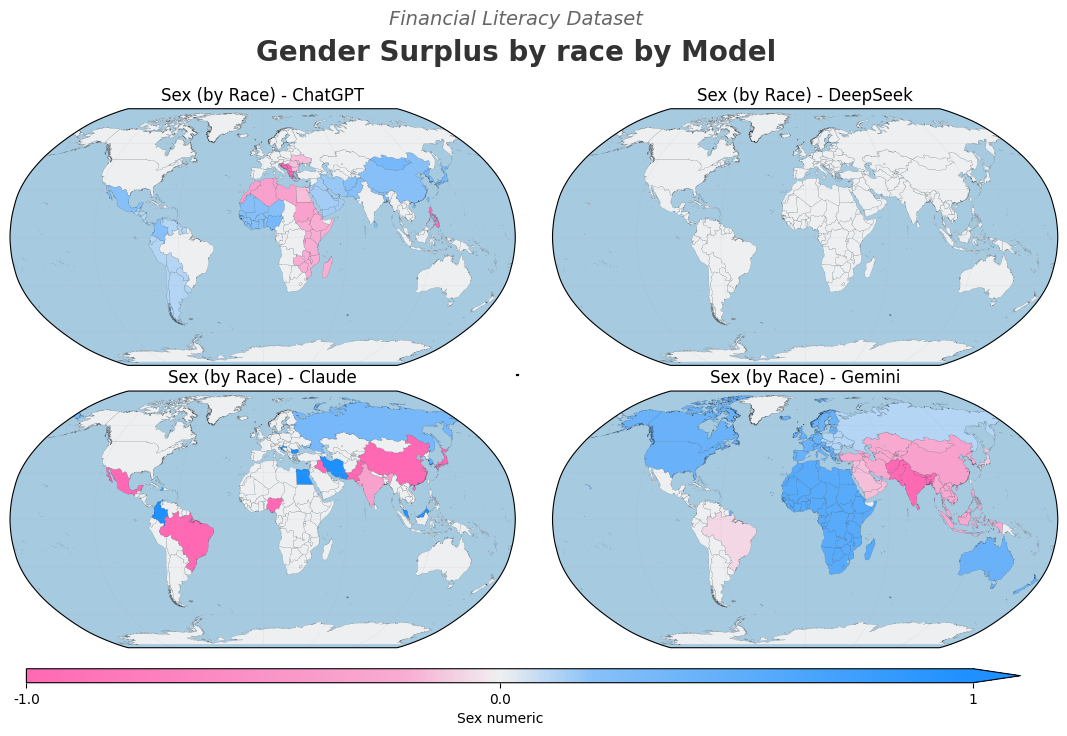

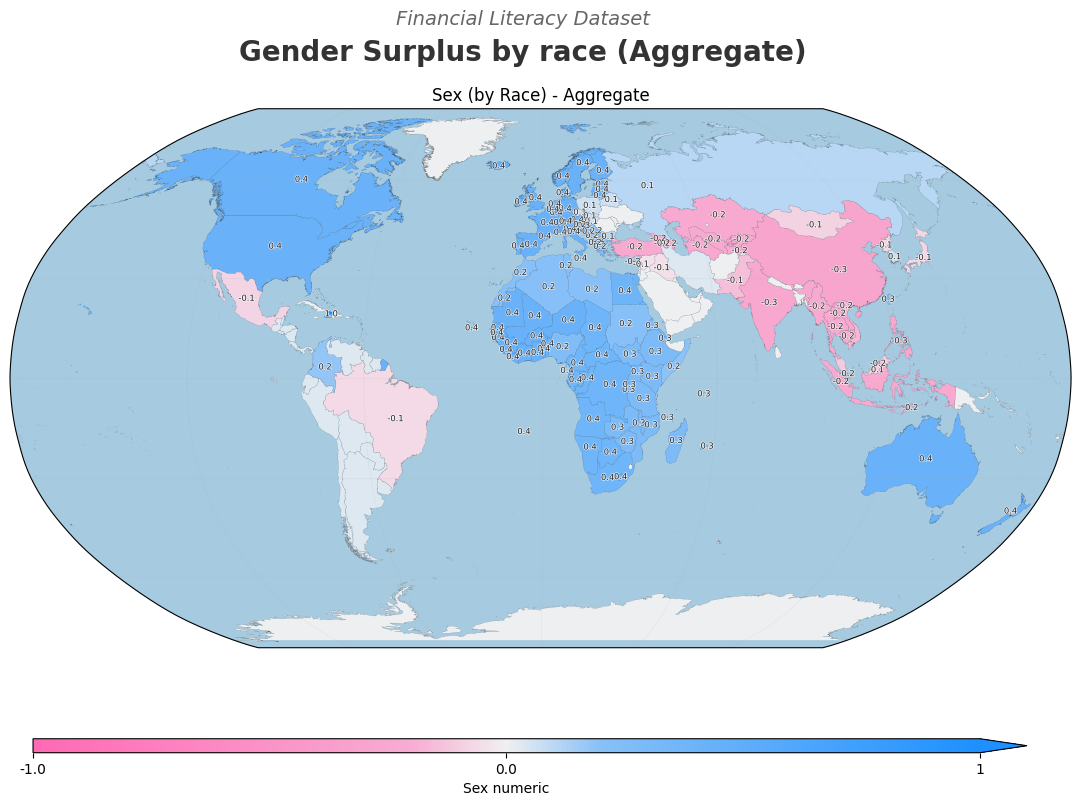

In [6]:
import matplotlib.colors as mcolors
pink_rgb = mcolors.to_rgb('#FF69B4') # Hot Pink
blue_rgb = mcolors.to_rgb('#1E90FF') # Dodger Blue
white_rgb = mcolors.to_rgb('#F0F0F0') # Slightly off-white

cmap = mcolors.LinearSegmentedColormap.from_list("sharper_pink_blue", list(zip([0.0, 0.4, 0.5, 0.6, 1.0], [pink_rgb, (pink_rgb[0]*0.5 + white_rgb[0]*0.5, pink_rgb[1]*0.5 + white_rgb[1]*0.5, pink_rgb[2]*0.5 + white_rgb[2]*0.5), white_rgb, (blue_rgb[0]*0.5 + white_rgb[0]*0.5, blue_rgb[1]*0.5 + white_rgb[1]*0.5, blue_rgb[2]*0.5 + white_rgb[2]*0.5), blue_rgb])))

share_legend = True

fig, axs = plt.subplots(2, 2, figsize=(14, 7), squeeze=False,
                        subplot_kw={'projection': ccrs.Robinson()},
                        gridspec_kw={'wspace': 0, 'hspace': 0.1})

for i,model in enumerate(['ChatGPT','Claude','DeepSeek','Gemini']):

    df = dfs[dataset][model]
    df['Country of Residence'] = df['Country of Residence'].apply(countryHelper.fix_country_naming)
    df['Country of Origin'] = df['Race'].apply(countryHelper.race2country)
    df['Sex Numeric'] = df['Sex'].map({'Female': -1, 'Male': 1}).fillna(0).astype(int)
    
    axs[i%2][i//2] = chizu.draw(
        df=df,x='Country of Origin', y='Sex Numeric',
        cmap=cmap, apply_hatching=False, clamp_axis=(-1,1),
        title=f'Sex (by Race) - {model}', show_labels=False,
        ax=axs[i%2][i//2],step=1,
        low_poly=False, log=False,
        max_count=3, legend=[0,0,share_legend,0][i],
    )
    
fig.suptitle('Gender Surplus by race by Model', 
             fontsize=20, y=0.98, fontweight='bold', color='#333333')
fig.text(0.5, 1, f'{dataset} Dataset', 
         ha='center', fontsize=14, color='#666666', style='italic')
plt.savefig(os.path.join('Case Studies',dataset,'data',f"Gender Countries (Map)"), dpi=300, bbox_inches='tight')
plt.show()

df = pd.concat([dfs[dataset][model] for model in models], ignore_index=True)
df['Country of Residence'] = df['Country of Residence'].apply(countryHelper.fix_country_naming)
df['Country of Origin'] = df['Race'].apply(countryHelper.race2country)
df['Sex Numeric'] = df['Sex'].map({'Female': -1, 'Male': 1}).fillna(0).astype(int)

fig, ax = plt.subplots(figsize=(14, 7), subplot_kw={'projection': ccrs.Robinson()})
ax = chizu.draw(
    df=df,x='Country of Origin', y='Sex Numeric',
    # cmap= sns.diverging_palette(h_neg=340, h_pos=240, center='light', as_cmap=True),
    cmap= cmap,
    title=f'Sex (by Race) - Aggregate',
    ax=ax, step=1, show_labels=True, apply_hatching=False,
    low_poly=False, log=False, clamp_axis=(-1,1),
    max_count=3, legend=True,
    legend_loc=[0,-0.1,0,0]
)

fig.suptitle('Gender Surplus by race (Aggregate)', 
             fontsize=20, y=0.98, fontweight='bold', color='#333333')
fig.text(0.5, 1, f'{dataset} Dataset', 
         ha='center', fontsize=14, color='#666666', style='italic')

plt.savefig(os.path.join('Case Studies',dataset,'data',f"Gender Countries (Map) - Aggregate"), dpi=300, bbox_inches='tight')
plt.show()

### Immigrating Countries (Map)

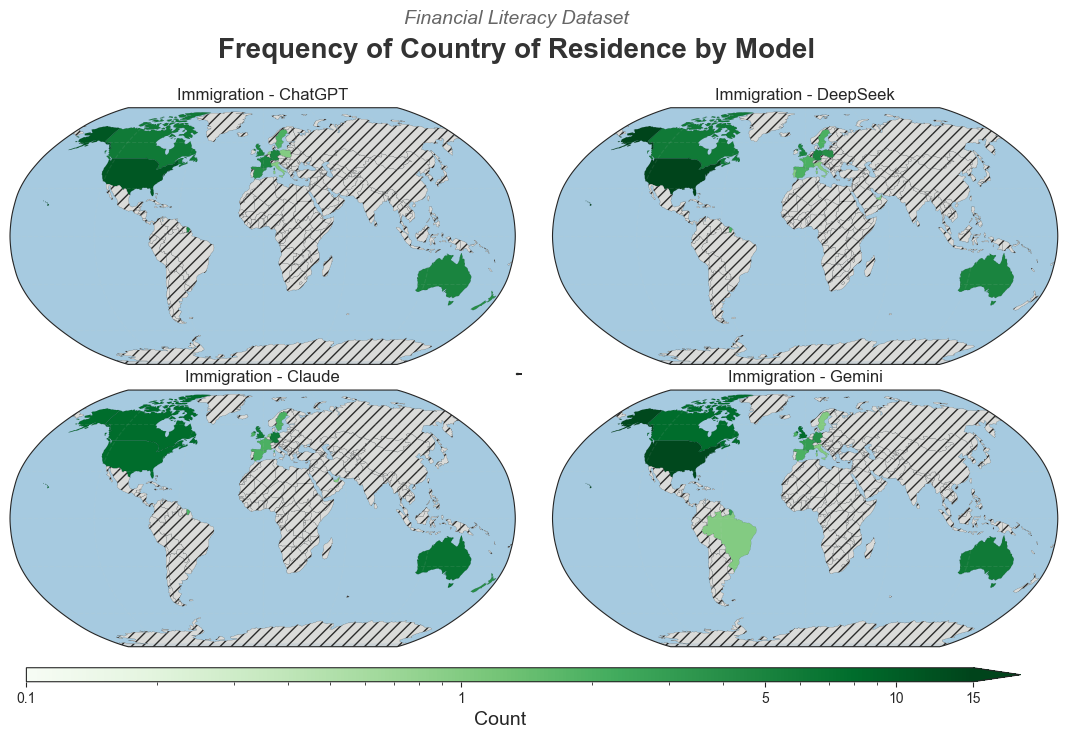

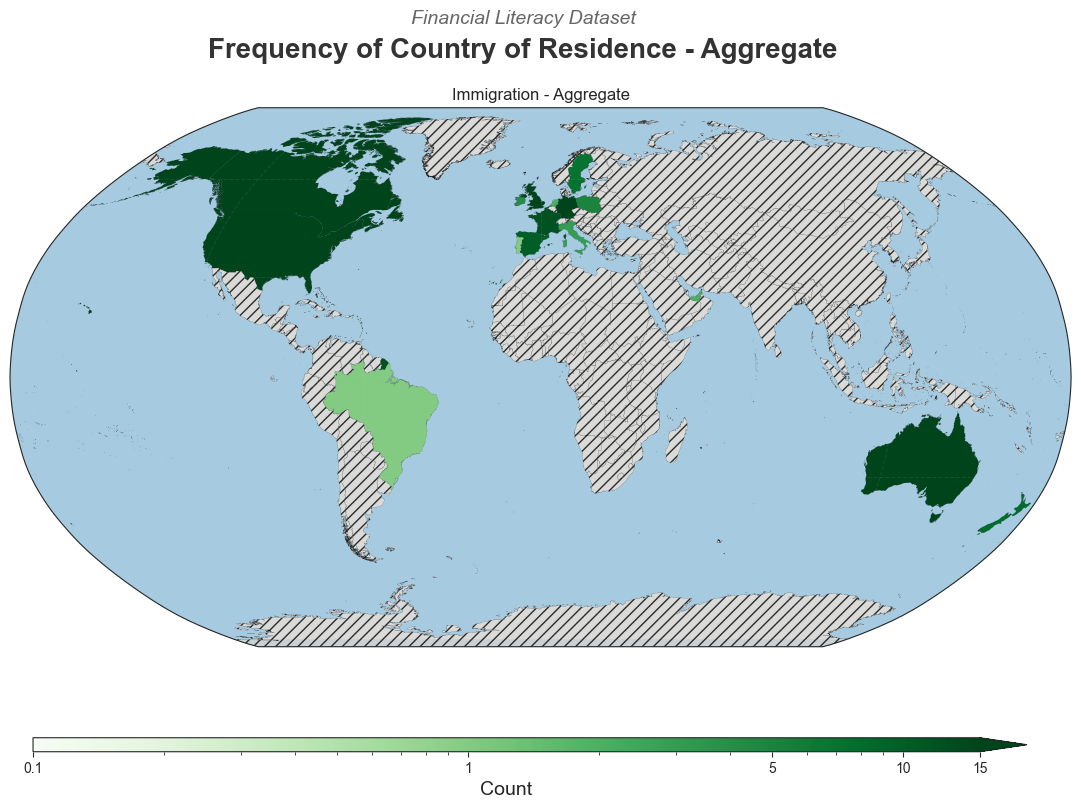

In [4]:
share_legend = True

fig, axs = plt.subplots(2, 2, figsize=(14, 7), squeeze=False,
                        subplot_kw={'projection': ccrs.Robinson()},
                        gridspec_kw={'wspace': 0, 'hspace': 0.1})

for i,model in enumerate(['ChatGPT','Claude','DeepSeek','Gemini']):

    df = dfs[dataset][model]
    df['Country of Residence'] = df['Country of Residence'].apply(countryHelper.fix_country_naming)
    
    axs[i%2][i//2] = chizu.draw(
        df=df,x='Country of Residence',
        title=f'Immigration - {model}',
        cmap='Greens', ax=axs[i%2][i//2],
        low_poly=True, log=True, step=5,
        max_count=15, legend=[0,0,share_legend,0][i],
    )

fig.suptitle('Frequency of Country of Residence by Model', 
             fontsize=20, y=0.98, fontweight='bold', color='#333333')
fig.text(0.5, 1, f'{dataset} Dataset', 
         ha='center', fontsize=14, color='#666666', style='italic')
plt.savefig(os.path.join('Case Studies',dataset,'data',f"Immigrating Countries (Map)"), dpi=300, bbox_inches='tight')
plt.show()

df = pd.concat([dfs[dataset][model] for model in models], ignore_index=True)
df['Country of Residence'] = df['Country of Residence'].apply(countryHelper.fix_country_naming)

fig, ax = plt.subplots(figsize=(14, 7), subplot_kw={'projection': ccrs.Robinson()})
ax = chizu.draw(
    df=df,x='Country of Residence',
    title=f'Immigration - Aggregate',
    cmap='Greens', ax=ax,step=5,
    low_poly=False, log=True,
    max_count=15, legend=True,
    legend_loc=[0,-0.1,0,0]
)
fig.suptitle('Frequency of Country of Residence - Aggregate', 
             fontsize=20, y=0.98, fontweight='bold', color='#333333')
fig.text(0.5, 1, f'{dataset} Dataset', 
         ha='center', fontsize=14, color='#666666', style='italic')
plt.savefig(os.path.join('Case Studies',dataset,'data',f"Immigrating Countries (Map) - Aggregate"), dpi=300, bbox_inches='tight')
plt.show()


### Immigrating Countries (Histogram)

c:\Users\Owner\Desktop\gender\draw.py:311: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.04, 1, 0.94])


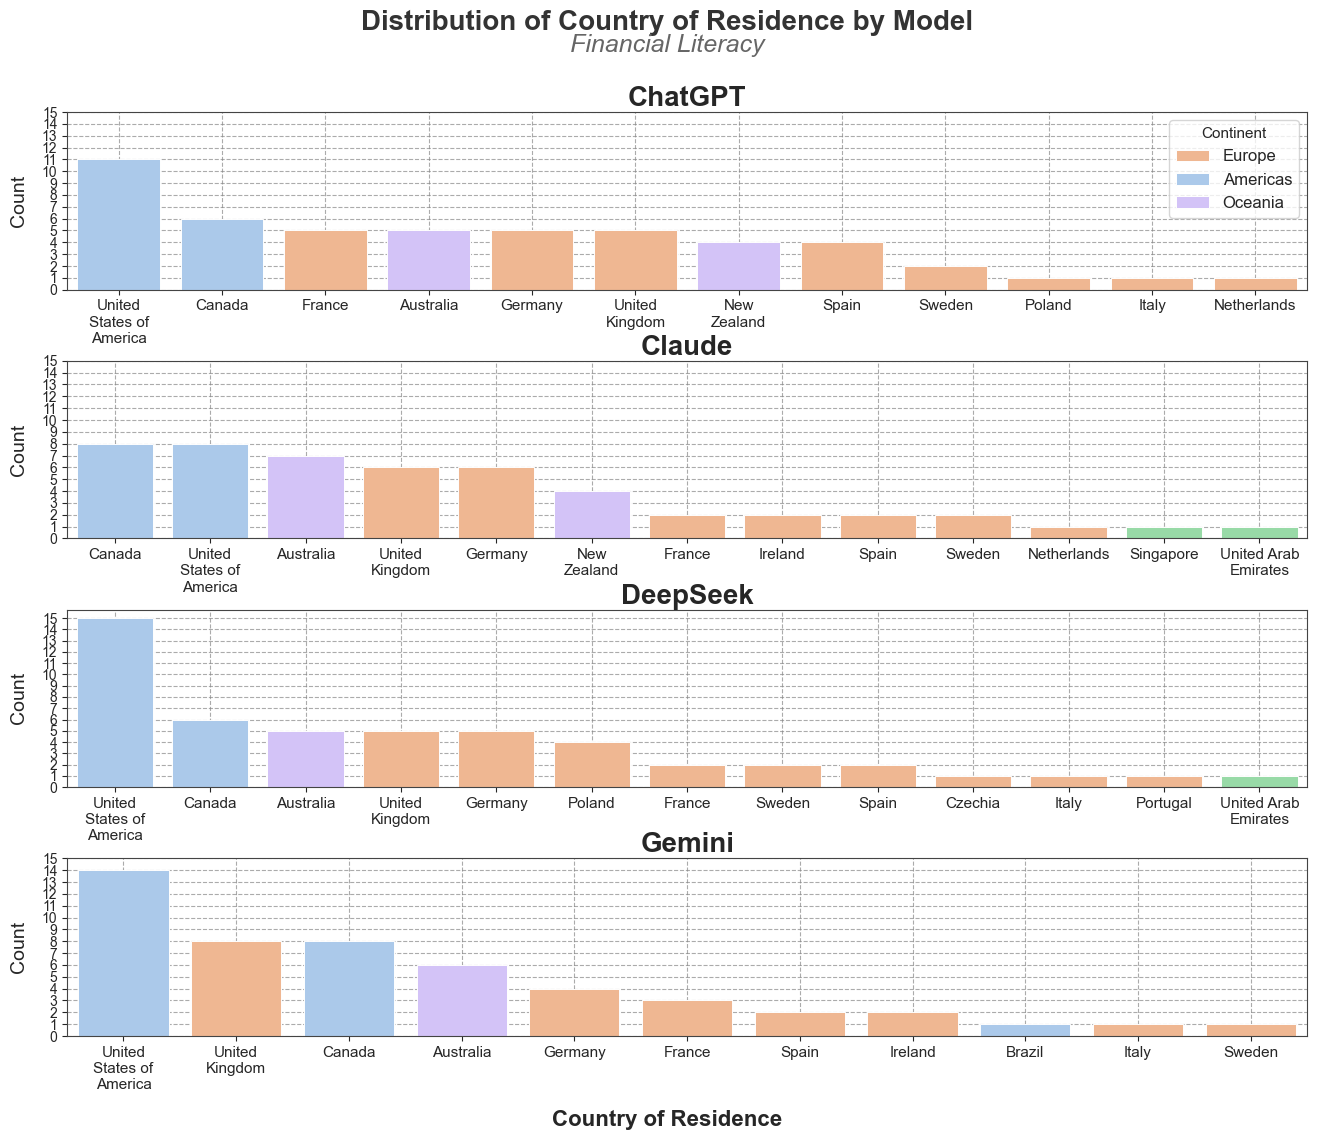

In [5]:
from draw import squeeze_text

models=['ChatGPT','Claude','DeepSeek','Gemini']
countryHelper = CountryHelper()

df = pd.concat([dfs[dataset][model].assign(model=model) for model in models], ignore_index=True)
df['Country of Residence'] = df['Country of Residence'].apply(countryHelper.country2short)
df['Country of Residence'] = df['Country of Residence'].apply(countryHelper.fix_country_naming)
df['Region'] = df['Country of Residence'].apply(
    lambda country: countryHelper.country2region(country)['subregion']
)
df['Continent'] = df['Country of Residence'].apply(
    lambda country: countryHelper.country2region(country)['region']
)

plt = histogram.draw(
    df=df,x='Country of Residence',
    hue='Continent', text_width=10,
    dataset=dataset, grid=True,
    aggregate=False,long_layout=True, title_size=20,
    figsize=(16,12), rotation=0,hspace=0.4
)
plt.savefig(os.path.join('Case Studies',dataset,'data',f"Immigrating Countries (Histogram)"), dpi=300, bbox_inches='tight')
plt.show()

### Immigrating Countries (Stacked)

c:\Users\Owner\Desktop\gender\draw.py:859: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.04, 1, 0.94])


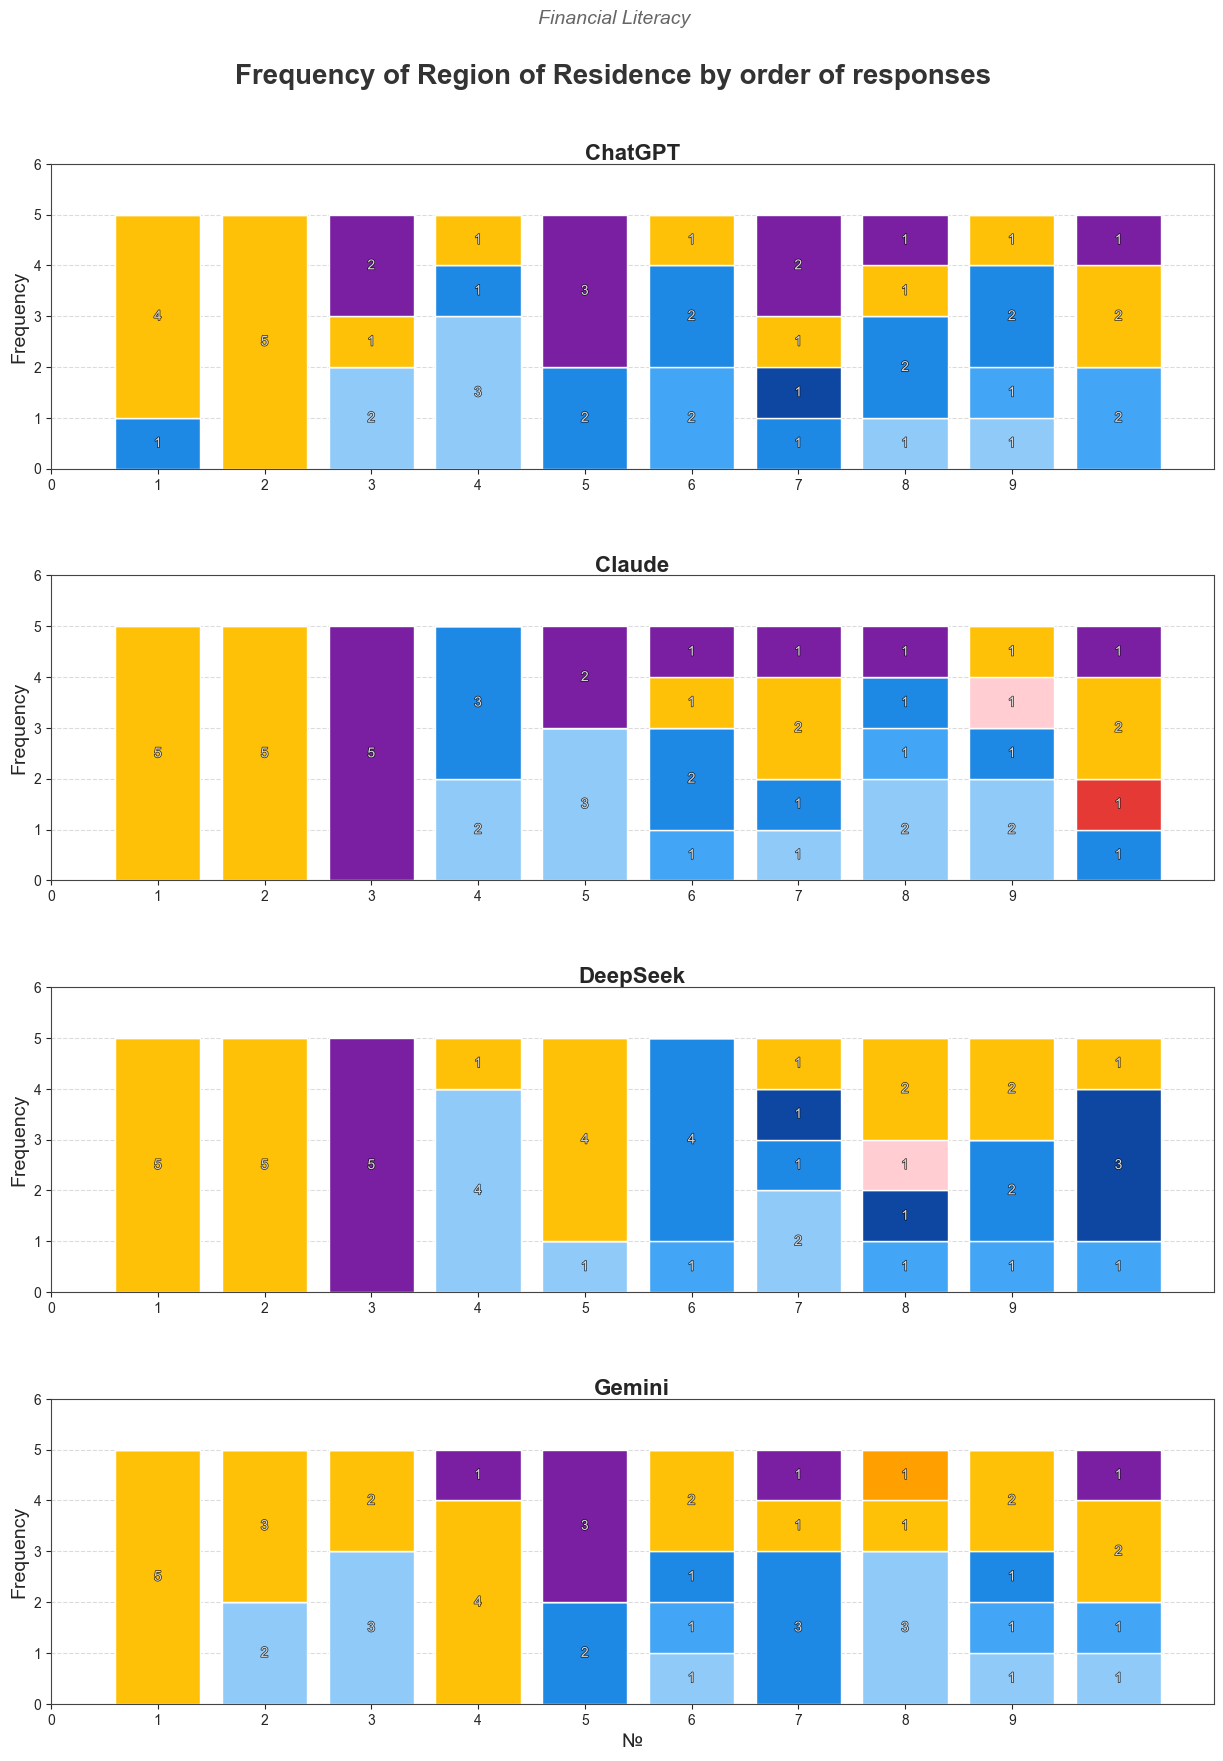

c:\Users\Owner\Desktop\gender\draw.py:859: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.04, 1, 0.94])


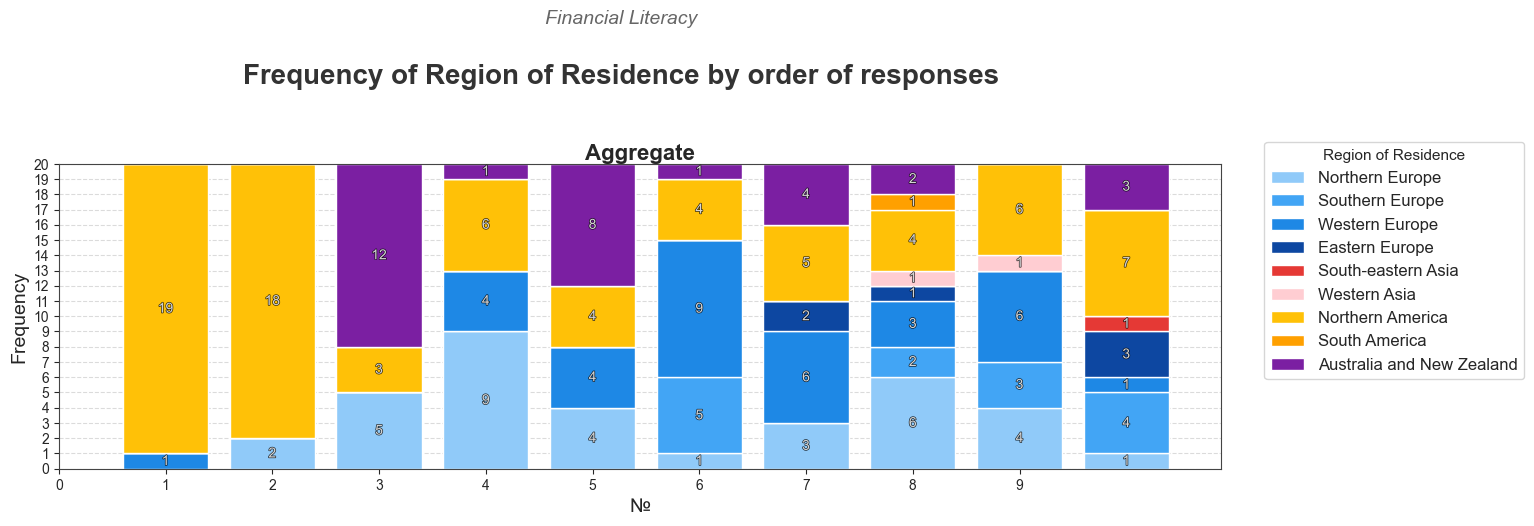

In [6]:
df = pd.concat([dfs[dataset][model].assign(model=model) for model in models], ignore_index=True)
df['Country of Residence'] = df['Country of Residence'].apply(countryHelper.country2short)
df['Country of Residence'] = df['Country of Residence'].apply(countryHelper.fix_country_naming)
df['Region of Residence'] = df['Country of Residence'].apply(
    lambda country: countryHelper.country2region(country)['subregion']
)
df['Continent'] = df['Country of Residence'].apply(
    lambda country: countryHelper.country2region(country)['region']
)

plt = stackedBar.draw(
    df=df,x='№',stacked_hue='Region of Residence',
    space=0.35, ylim=6, bar_labels=True, dataset=dataset,
    figsize=(15,20), grid=True, legend=False
)
plt.savefig(os.path.join('Case Studies',dataset,'data',f"Immigrating Countries (Stacked)"), dpi=300, bbox_inches='tight')
plt.show()

plt = stackedBar.draw(
    df=df,x='№',stacked_hue='Region of Residence', aggregate=True,
    space=0.35, ylim=20, bar_labels=True, dataset=dataset,
    figsize=(15,20), grid=True, legend=True
)
plt.savefig(os.path.join('Case Studies',dataset,'data',f"Immigrating Countries (Stacked) - Aggregate"), dpi=300, bbox_inches='tight')
plt.show()

### Age and Race (Map)

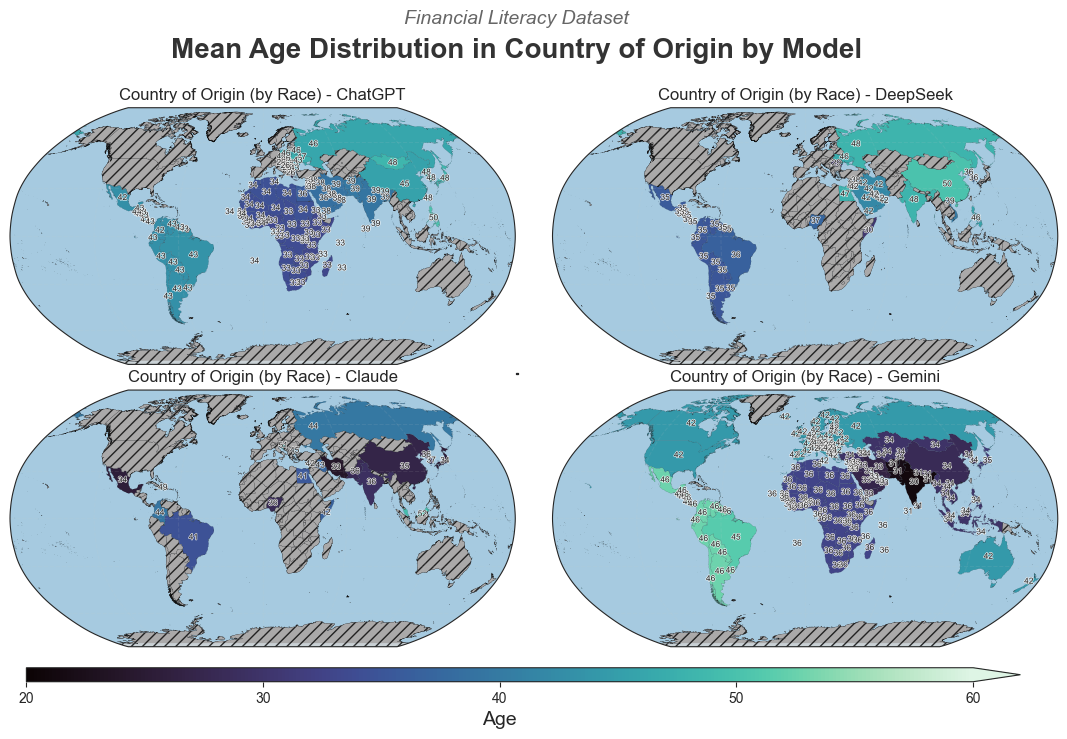

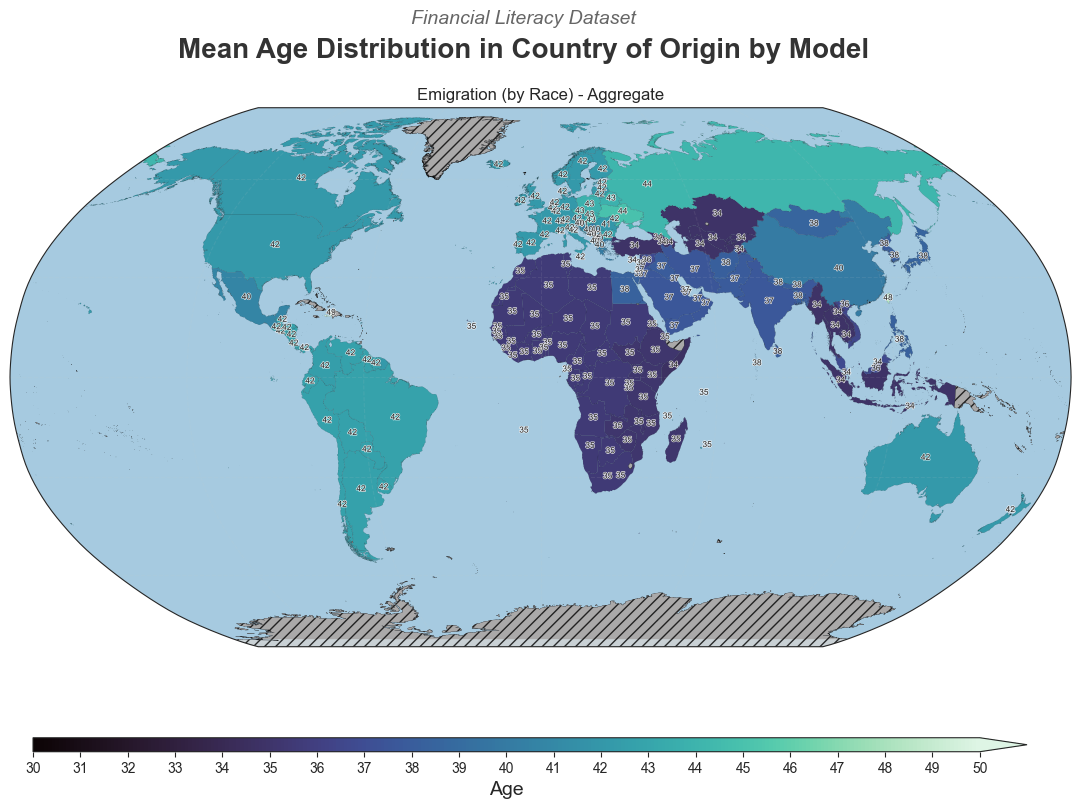

In [7]:
share_legend = True

fig, axs = plt.subplots(2, 2, figsize=(14, 7), squeeze=False,
                        subplot_kw={'projection': ccrs.Robinson()},
                        gridspec_kw={'wspace': 0, 'hspace': 0.1})

for i,model in enumerate(['ChatGPT','Claude','DeepSeek','Gemini']):

    df = dfs[dataset][model]
    df['Country of Residence'] = df['Country of Residence'].apply(countryHelper.fix_country_naming)
    df['Country of Origin'] = df['Race'].apply(countryHelper.race2country)
    
    axs[i%2][i//2] = chizu.draw(
        df=df,x='Country of Origin', y='Age',
        title=f'Country of Origin (by Race) - {model}',
        cmap='mako', ax=axs[i%2][i//2], step=10,
        low_poly=False, log=False, show_labels=True,
        max_count=60, legend=[0,0,share_legend,0][i],
    )
    
fig.suptitle('Mean Age Distribution in Country of Origin by Model', 
             fontsize=20, y=0.98, fontweight='bold', color='#333333')
fig.text(0.5, 1, f'{dataset} Dataset', 
         ha='center', fontsize=14, color='#666666', style='italic')
plt.savefig(os.path.join('Case Studies',dataset,'data',f"Age and Race (Map)"), dpi=300, bbox_inches='tight')
plt.show()

df = pd.concat([dfs[dataset][model] for model in models], ignore_index=True)
df['Country of Residence'] = df['Country of Residence'].apply(countryHelper.fix_country_naming)
df['Country of Origin'] = df['Race'].apply(countryHelper.race2country)

fig, ax = plt.subplots(figsize=(14, 7), subplot_kw={'projection': ccrs.Robinson()})
ax = chizu.draw(
    df=df,x='Country of Origin',y='Age',
    title=f'Emigration (by Race) - Aggregate',
    cmap='mako', ax=ax, step=1,
    low_poly=False, log=False, show_labels=True,
    max_count=60, legend=True,
    legend_loc=[0,-0.1,0,0]
)
fig.suptitle('Mean Age Distribution in Country of Origin by Model', 
             fontsize=20, y=0.98, fontweight='bold', color='#333333')
fig.text(0.5, 1, f'{dataset} Dataset', 
         ha='center', fontsize=14, color='#666666', style='italic')
plt.savefig(os.path.join('Case Studies',dataset,'data',f"Age and Race (Map) - Aggregate"), dpi=300, bbox_inches='tight')
plt.show()

### Age and Race (Histogram)

c:\Users\Owner\Desktop\gender\draw.py:122: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([


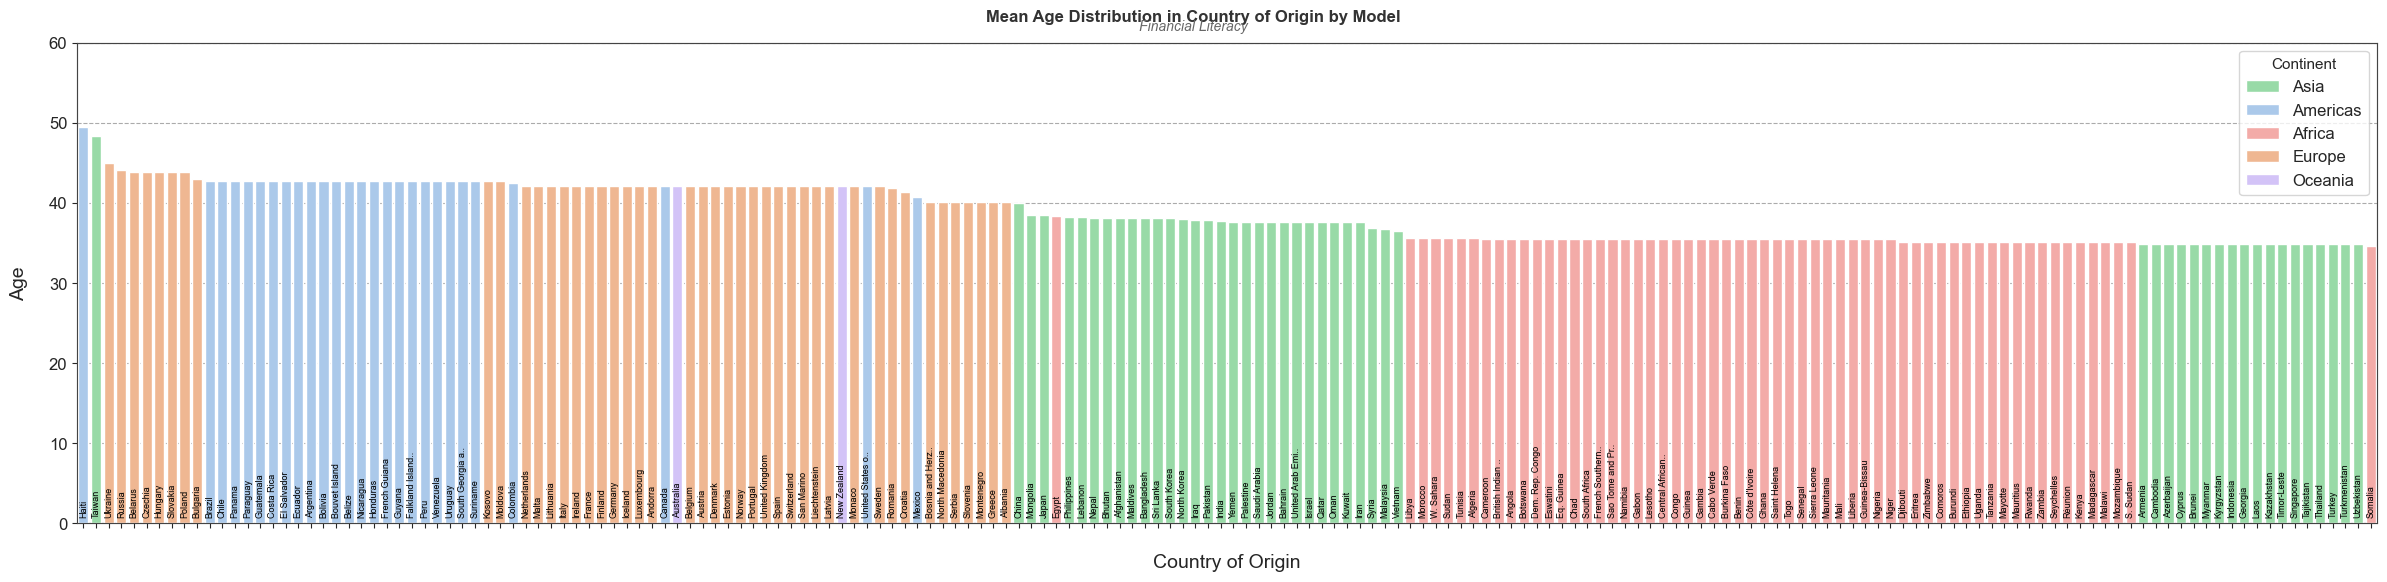

In [8]:
models=['ChatGPT','Claude','DeepSeek','Gemini']
countryHelper = CountryHelper()

df = pd.concat([dfs[dataset][model].assign(model=model) for model in models], ignore_index=True)
df['Country of Residence'] = df['Country of Residence'].apply(countryHelper.country2short)
df['Country of Residence'] = df['Country of Residence'].apply(countryHelper.fix_country_naming)
df['Country of Origin'] = df['Race'].apply(countryHelper.race2country)
df['Country of Origin'] = df['Country of Origin'].apply(countryHelper.fix_country_naming)

df_2 = countryHelper.get_country_average_y(df,x='Country of Origin',y='Age')
df_2['Continent'] = df_2['Country of Origin'].apply(lambda x: countryHelper.country2region(x)['region'])
plt = histogram.draw(
    df=df_2,x='Country of Origin', y='Age',
    hue='Continent', ylim=60, ystep=10,
    dataset=dataset,
    aggregate=True,long_layout=True,
    xtick_label_max_len=15,
    figsize=(10,12)
)
plt.savefig(os.path.join('Case Studies',dataset,'data',f"Age and Race (Histogram) - Aggregate"), dpi=300, bbox_inches='tight')
plt.show()

### Employment by Subsector (Piechart)

c:\Users\Owner\Desktop\gender\draw.py:548: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.04, 1, 0.94])


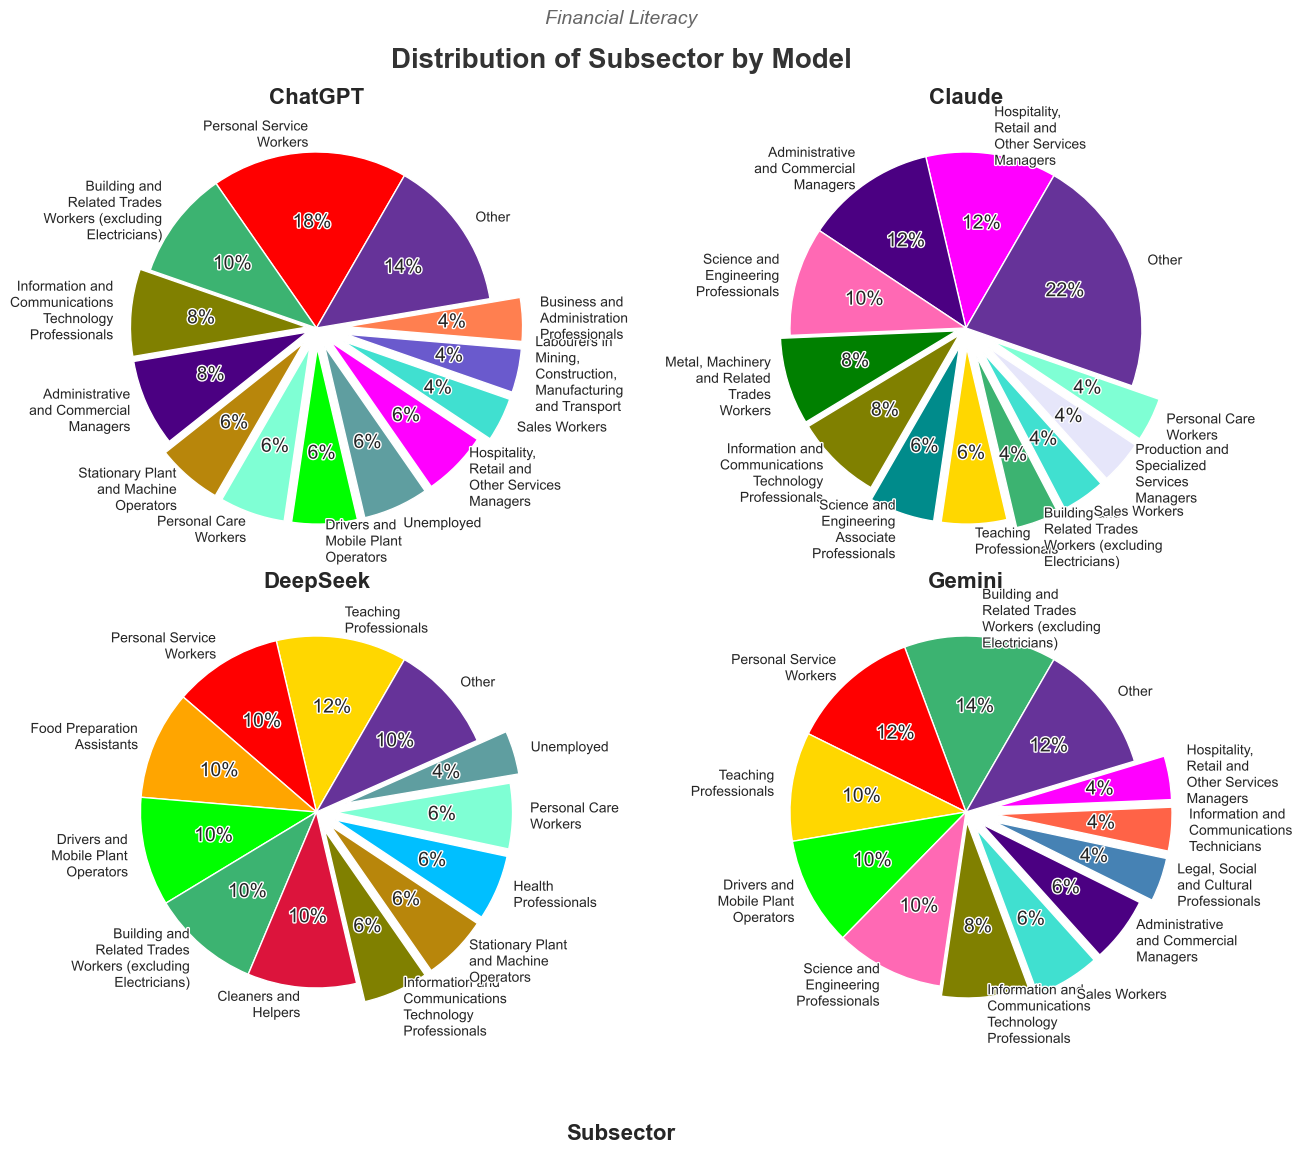

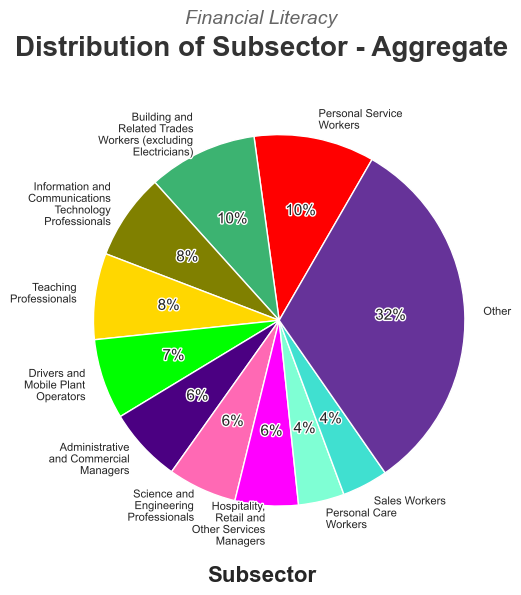

In [9]:
import os
import pandas as pd
from draw import Histogram, Piechart, Map
from helper import CountryHelper,JobHelper

models = ["ChatGPT","Claude","DeepSeek","Gemini"]
case_studies = ["Career Development","Family Health","Financial Literacy","Media Literacy"]
dataset = "Financial Literacy"
piechart = Piechart(models)

dfs = {
    case_study: {
        model:pd.read_csv(os.path.join("Case Studies",case_study,f'{model}.csv'))
        for model in models
    }
    for case_study in case_studies
}

#Make piechart function for each gender's employment/education
jobHelper = JobHelper()
df = pd.concat([dfs[dataset][model].assign(model=model) for model in models], ignore_index=True)
df['Sector'] = df['Employment'].apply(lambda job: jobHelper.employment2sector(job))
df['Subsector'] = df['Employment'].apply(lambda job: jobHelper.employment2subsector(job))

plt = piechart.draw(
    df,x="Subsector",
    dataset=dataset,
    aggregate=False, other=0.04,
    text_width=15, rotation=60, space=0.1,
)
plt.savefig(os.path.join('Case Studies',dataset,'data',f"Employment by Subsector (Piechart)"), dpi=300, bbox_inches='tight')
plt.show()

plt = piechart.draw(
    df,x="Subsector",
    dataset=dataset,
    aggregate=True, other=0.04,
    text_width=15, rotation=60,
    figsize=(6,6),
)
plt.savefig(os.path.join('Case Studies',dataset,'data',f"Employment by Subsector (Piechart) - Aggregate"), dpi=300, bbox_inches='tight')
plt.show()

### Employment by Subsector (Histogram)

c:\Users\Owner\Desktop\gender\draw.py:311: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.04, 1, 0.94])


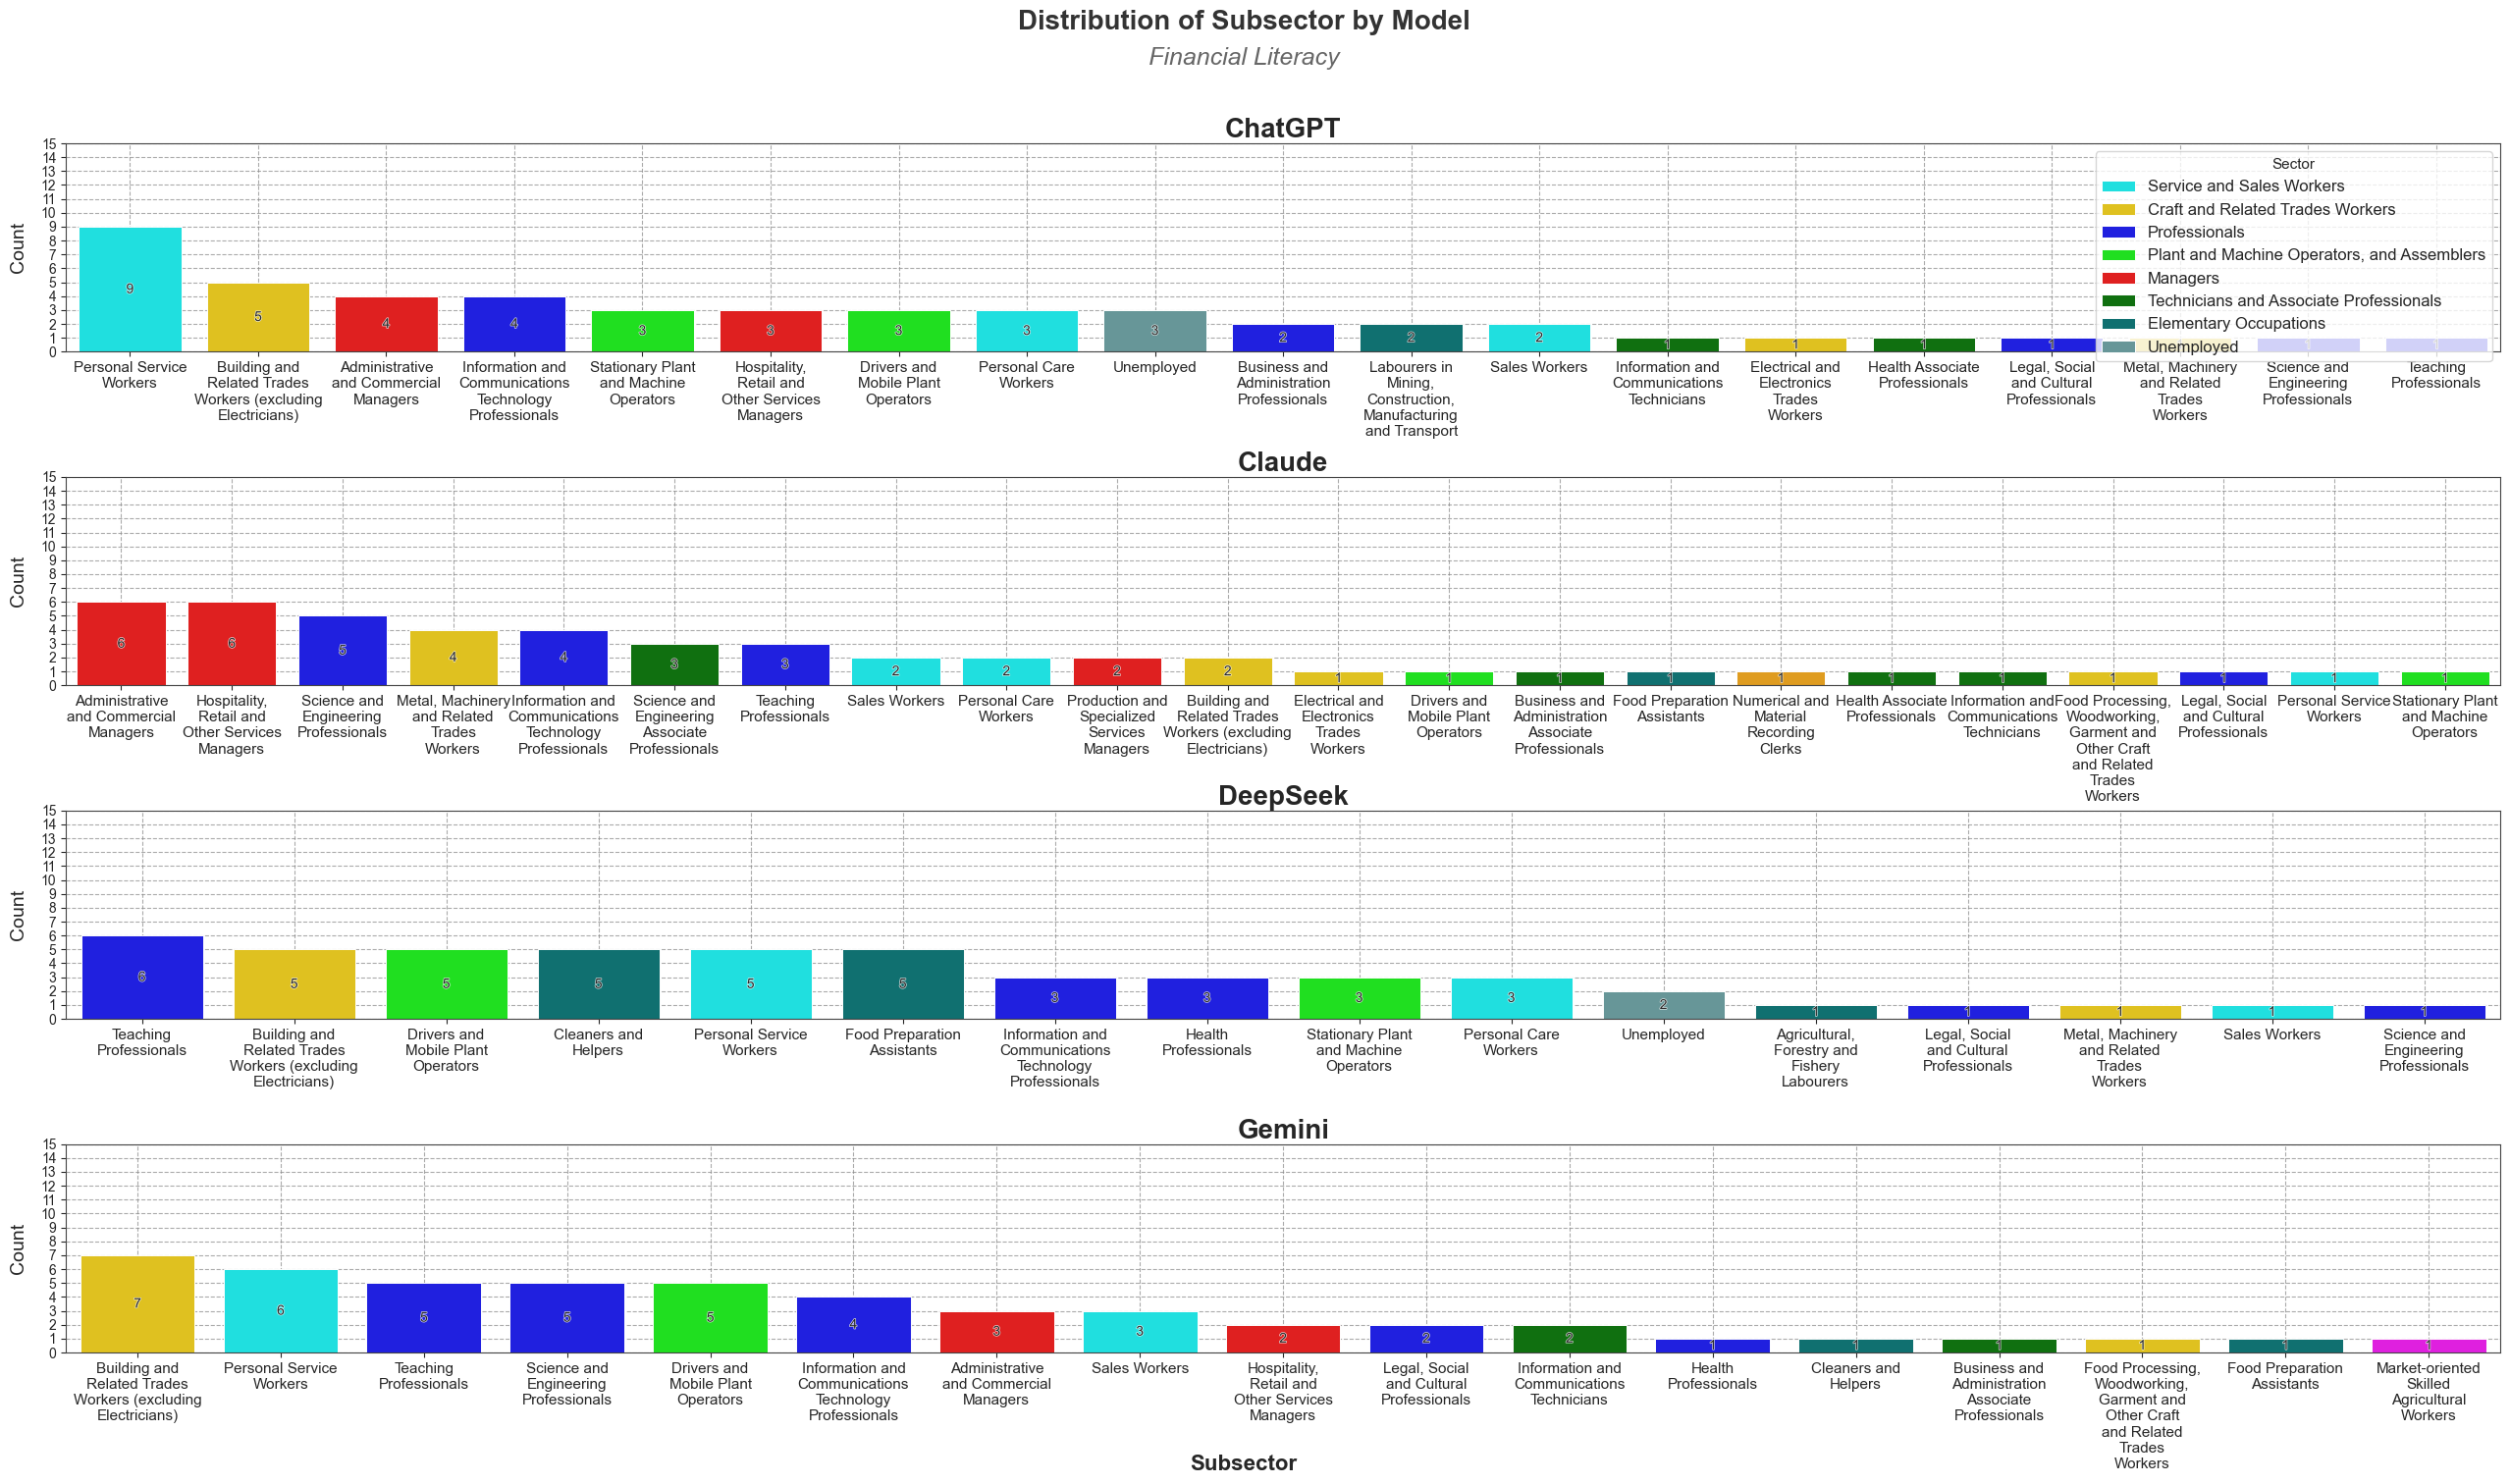

In [10]:
import os
import pandas as pd
from draw import Histogram, Piechart, Map
from helper import CountryHelper,JobHelper

models = ["ChatGPT","Claude","DeepSeek","Gemini"]
case_studies = ["Career Development","Family Health","Financial Literacy","Media Literacy"]
piechart = Piechart(models)
dataset = "Financial Literacy"

dfs = {
    case_study: {
        model:pd.read_csv(os.path.join("Case Studies",case_study,f'{model}.csv'))
        for model in models
    }
    for case_study in case_studies
}

#Make piechart function for each gender's employment/education
jobHelper = JobHelper()
df = pd.concat([dfs[dataset][model].assign(model=model) for model in models], ignore_index=True)
df['Sector'] = df['Employment'].apply(lambda job: jobHelper.employment2sector(job))
df['Subsector'] = df['Employment'].apply(lambda job: jobHelper.employment2subsector(job))

histogram = Histogram(models)
plt = histogram.draw(
    df,x='Subsector', hue='Sector',
    dataset=dataset, bar_labels=True,
    aggregate=False,long_layout=True,
    rotation=0, text_width=15,
    hspace=0.6,figsize=(32,16),
    title_size=20, grid=True
    # xtick_label_max_len=25
)
plt.savefig(os.path.join('Case Studies',dataset,'data',f"Employment by Subsector (Histogram)"), dpi=300, bbox_inches='tight')
plt.show()

### Employment by Sector (Piechart)

c:\Users\Owner\Desktop\gender\draw.py:548: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.04, 1, 0.94])


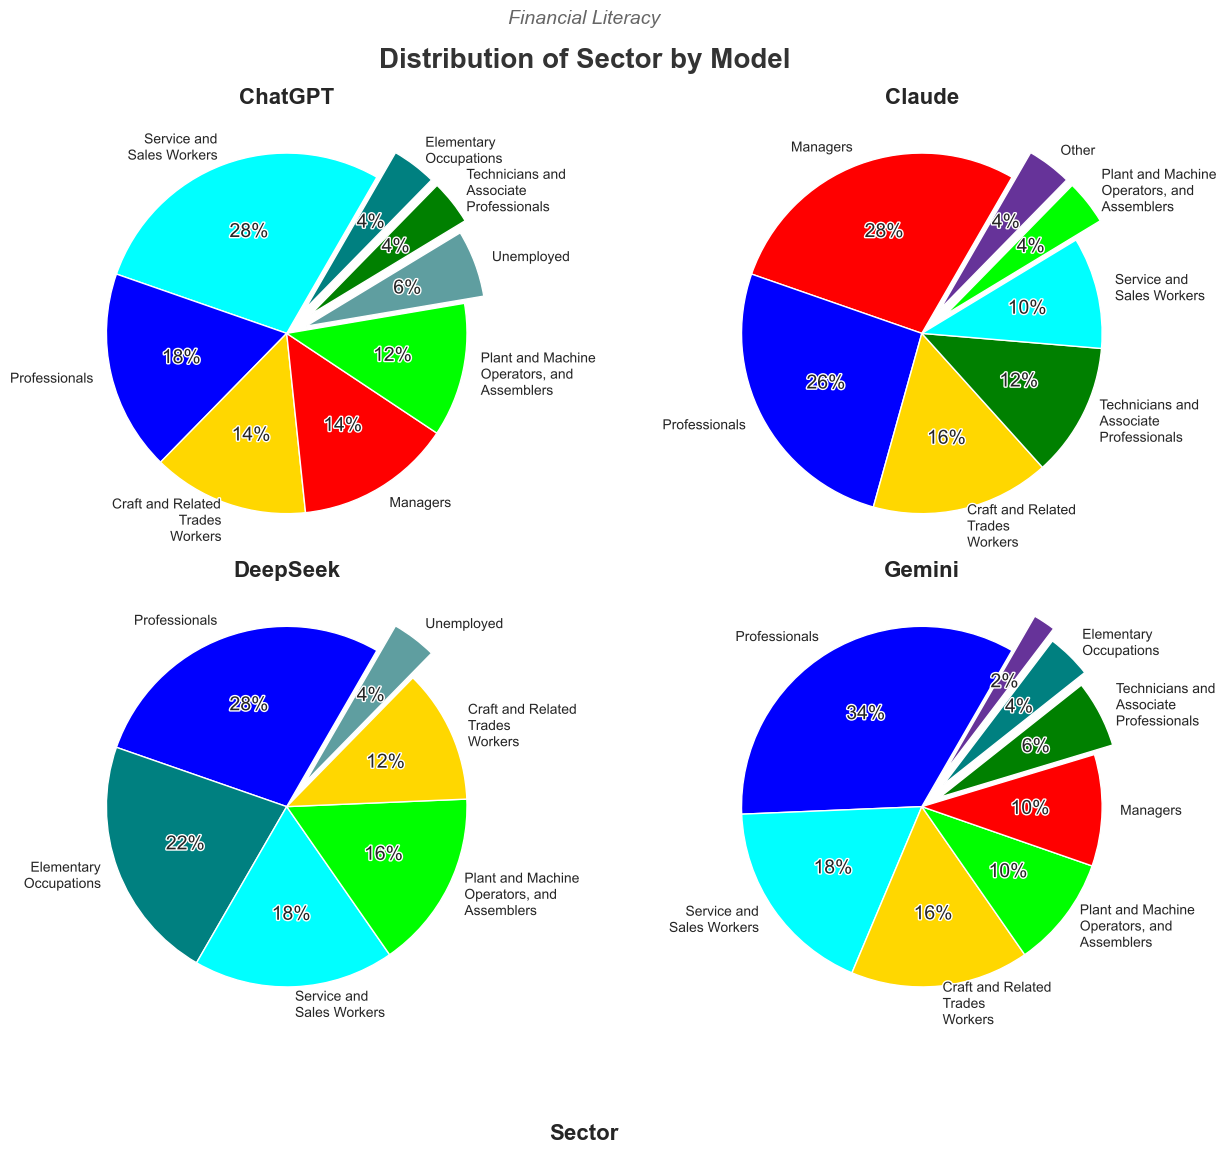

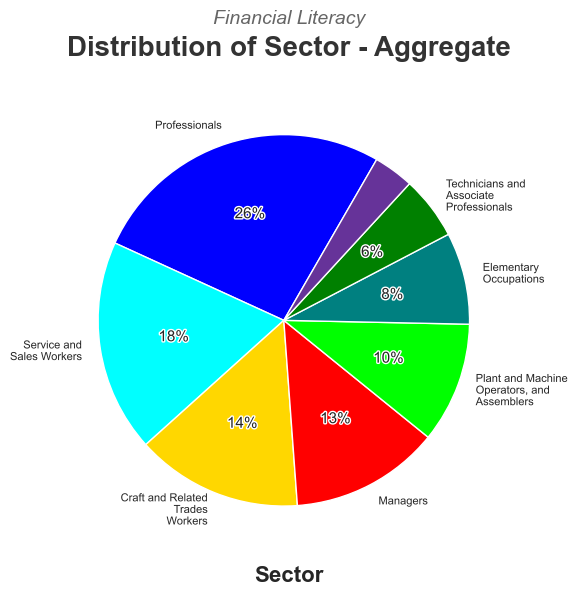

In [11]:
import os
import pandas as pd
from draw import Histogram, Piechart, Map
from helper import CountryHelper,JobHelper

models = ["ChatGPT","Claude","DeepSeek","Gemini"]
case_studies = ["Career Development","Family Health","Financial Literacy","Media Literacy"]
piechart = Piechart(models)
dataset = "Financial Literacy"

dfs = {
    case_study: {
        model:pd.read_csv(os.path.join("Case Studies",case_study,f'{model}.csv'))
        for model in models
    }
    for case_study in case_studies
}

#Make piechart function for each gender's employment/education
jobHelper = JobHelper()
df = pd.concat([dfs[dataset][model].assign(model=model) for model in models], ignore_index=True)
df['Sector'] = df['Employment'].apply(lambda job: jobHelper.employment2sector(job))
df['Subsector'] = df['Employment'].apply(lambda job: jobHelper.employment2subsector(job))

plt = piechart.draw(
    df,x="Sector",
    dataset=dataset,
    aggregate=False, other=0.04, space=0.05,
    text_width=15, rotation=60
)
plt.savefig(os.path.join('Case Studies',dataset,'data',f"Employment by Sector (Piechart)"), dpi=300, bbox_inches='tight')
plt.show()

plt = piechart.draw(
    df,x="Sector", figsize=(6,6),
    dataset=dataset,
    aggregate=True, other=0.04,
    space=0.05, text_width=15, rotation=60,
)
plt.savefig(os.path.join('Case Studies',dataset,'data',f"Employment by Sector (Piechart) - Aggregate"), dpi=300, bbox_inches='tight')
plt.show()

### Age, Education, Gender (BarChart)

high school high school high school high school diploma secondary education high school diploma high school high school high school high school high school primary school high school high school high school high school diploma high school equivalent primary school education high school diploma high school diploma from mexico high school equivalent from haiti high school diploma high school equivalent high school diploma from mexico high school diploma high school diploma high school diploma high school diploma high school diploma high school diploma high school diploma high school diploma high school diploma high school diploma middle school high school diploma high school diploma high school diploma high school diploma high school diploma high school diploma some high school high school diploma high school diploma some high school high school diploma high school diploma high school diploma some high school high school diploma high school diploma some high school high school diploma hi

c:\Users\Owner\Desktop\gender\draw.py:296: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.xaxis.grid(not swarm, linestyle='--', alpha=0.7 if not swarm else 0, color='#888888')
c:\Users\Owner\Desktop\gender\draw.py:296: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.xaxis.grid(not swarm, linestyle='--', alpha=0.7 if not swarm else 0, color='#888888')
c:\Users\Owner\Desktop\gender\draw.py:296: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.xaxis.grid(not swarm, linestyle='--', alpha=0.7 if not swarm else 0, color='#888888')
c:\Users\Owner\Desktop\gender\draw.py:296: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.xaxis.grid(not swarm, linestyle='--', alpha=0.7 if not swarm else 0, color='#888888')
c:\Users\Owner\Desktop\gende

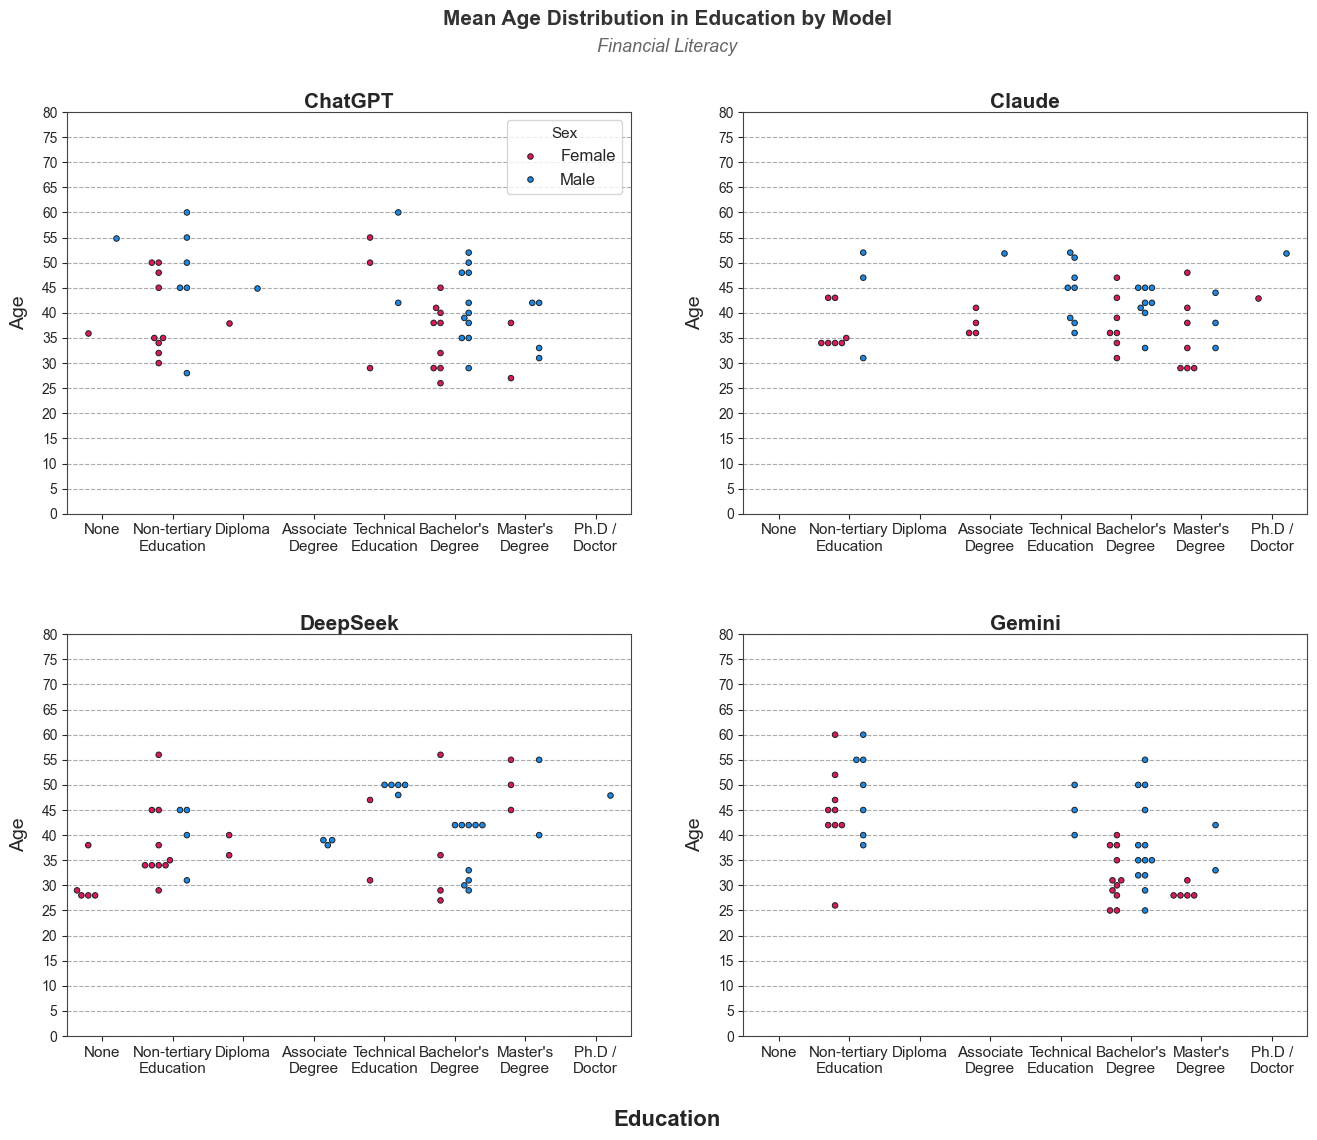

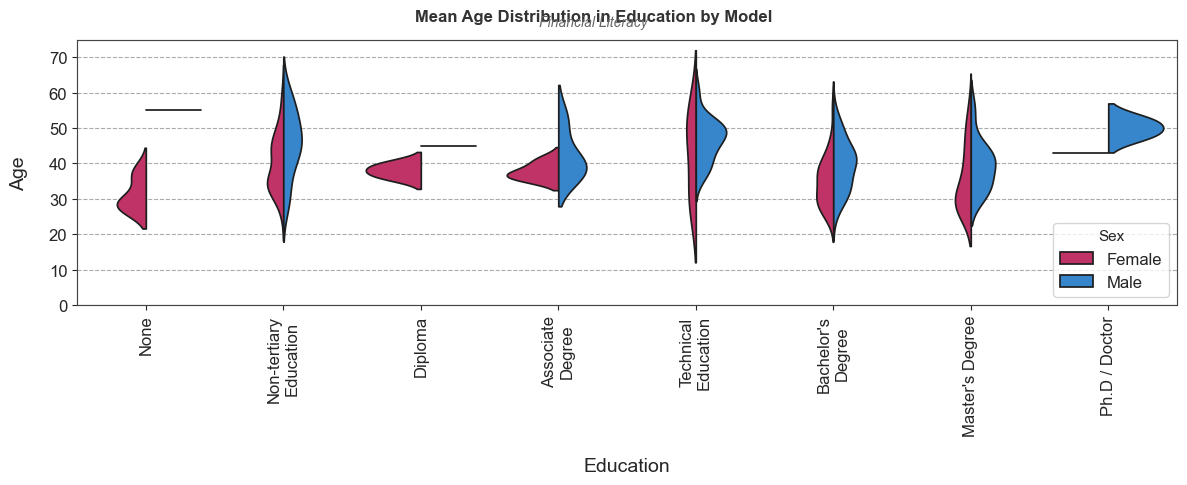

In [12]:
df = pd.concat([dfs[dataset][model].assign(model=model) for model in models], ignore_index=True)
df['Education'] = df['Education'].apply(jobHelper.education2certification)
df['Sex'] = df['Sex'].apply(sexHelper.sex2standard)

plt = histogram.draw(
    df=df,x='Education',
    hue='Sex',y='Age',
    dataset=dataset,
    aggregate=False, text_width=12,
    rotation=0, ylim=80, ystep=5, violin=False,swarm=True,
    figsize=(16,12), grid=True, title_size=15
)
plt.savefig(os.path.join('Case Studies',dataset,'data',f"Age Education Gender (BarChart)"), dpi=300, bbox_inches='tight')
plt.show()

plt = histogram.draw(
    df=df,x='Education',
    hue='Sex',y='Age',
    dataset=dataset,
    aggregate=True, text_width=15,
    rotation=90, ylim=70, ystep=10, violin=True,swarm=False,
    figsize=(12,5), grid=True, 
)
plt.savefig(os.path.join('Case Studies',dataset,'data',f"Age Education Gender (BarChart) - Aggregate"), dpi=300, bbox_inches='tight')
plt.show()

### Age, Employment, Gender (BarChart)

c:\Users\Owner\Desktop\gender\draw.py:296: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.xaxis.grid(not swarm, linestyle='--', alpha=0.7 if not swarm else 0, color='#888888')
c:\Users\Owner\Desktop\gender\draw.py:296: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.xaxis.grid(not swarm, linestyle='--', alpha=0.7 if not swarm else 0, color='#888888')
c:\Users\Owner\Desktop\gender\draw.py:296: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.xaxis.grid(not swarm, linestyle='--', alpha=0.7 if not swarm else 0, color='#888888')
c:\Users\Owner\Desktop\gender\draw.py:296: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.xaxis.grid(not swarm, linestyle='--', alpha=0.7 if not swarm else 0, color='#888888')
c:\Users\Owner\Desktop\gende

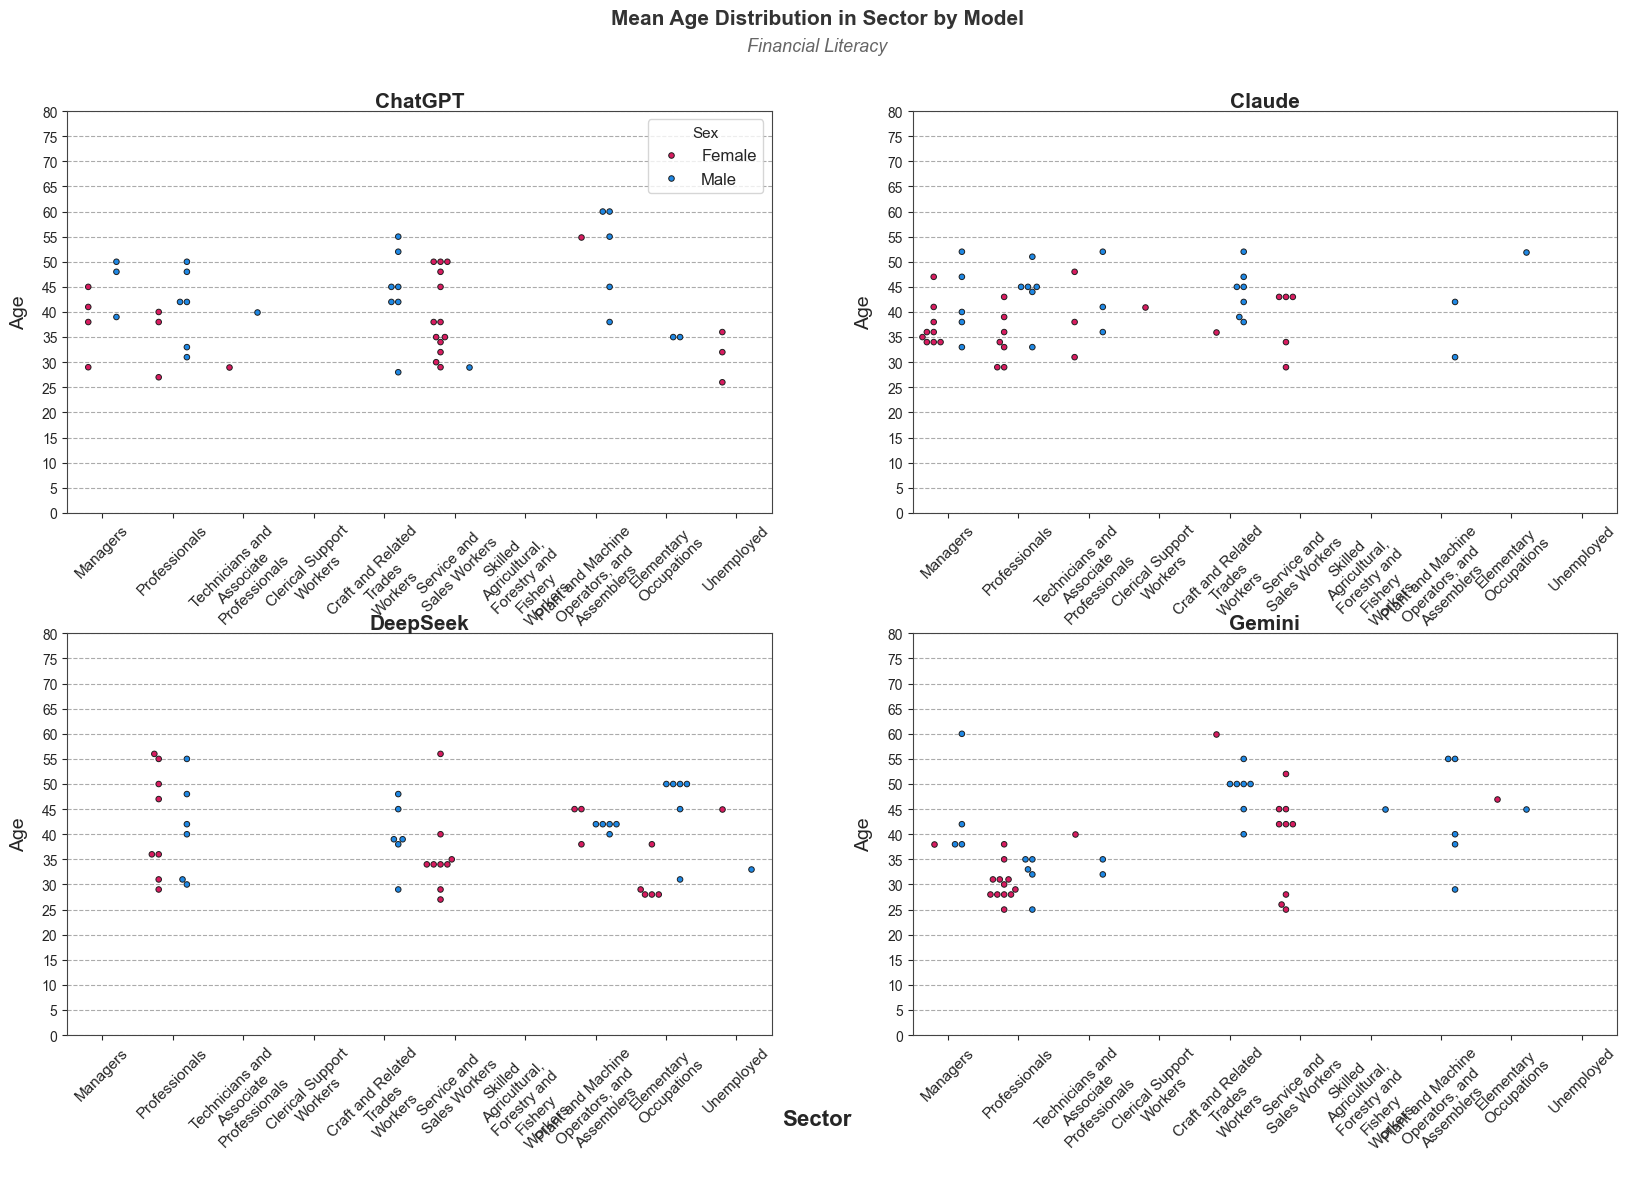

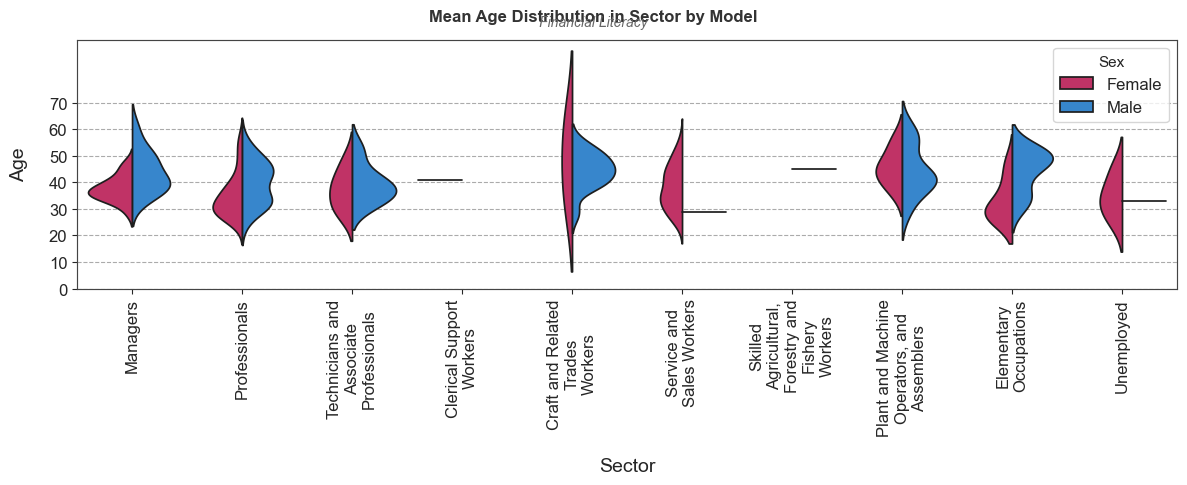

In [13]:
df = pd.concat([dfs[dataset][model].assign(model=model) for model in models], ignore_index=True)
df['Sector']    = df['Employment'].apply(jobHelper.employment2sector)   
df['Sex'] = df['Sex'].apply(sexHelper.sex2standard)

plt = histogram.draw(
    df=df,x='Sector',
    hue='Sex',y='Age',
    dataset=dataset,
    aggregate=False, text_width=15,
    rotation=45, ylim=80, ystep=5, violin=False,swarm=True,
    figsize=(20,12), grid=True, title_size=15,
)
plt.savefig(os.path.join('Case Studies',dataset,'data',f"Age Employment Gender (BarChart)"), dpi=300, bbox_inches='tight')
plt.show()

plt = histogram.draw(
    df=df,x='Sector',
    hue='Sex',y='Age',
    dataset=dataset,
    aggregate=True, text_width=15,
    rotation=90, ylim=70, ystep=10, violin=True,swarm=False,
    figsize=(12,5), grid=True, 
)
plt.savefig(os.path.join('Case Studies',dataset,'data',f"Age Employment Gender (BarChart) - Aggregate"), dpi=300, bbox_inches='tight')
plt.show()

high school high school high school high school diploma secondary education high school diploma high school high school high school high school high school primary school high school high school high school high school diploma high school equivalent primary school education high school diploma high school diploma from mexico high school equivalent from haiti high school diploma high school equivalent high school diploma from mexico high school diploma high school diploma high school diploma high school diploma high school diploma high school diploma high school diploma high school diploma high school diploma high school diploma middle school high school diploma high school diploma high school diploma high school diploma high school diploma high school diploma some high school high school diploma high school diploma some high school high school diploma high school diploma high school diploma some high school high school diploma high school diploma some high school high school diploma hi

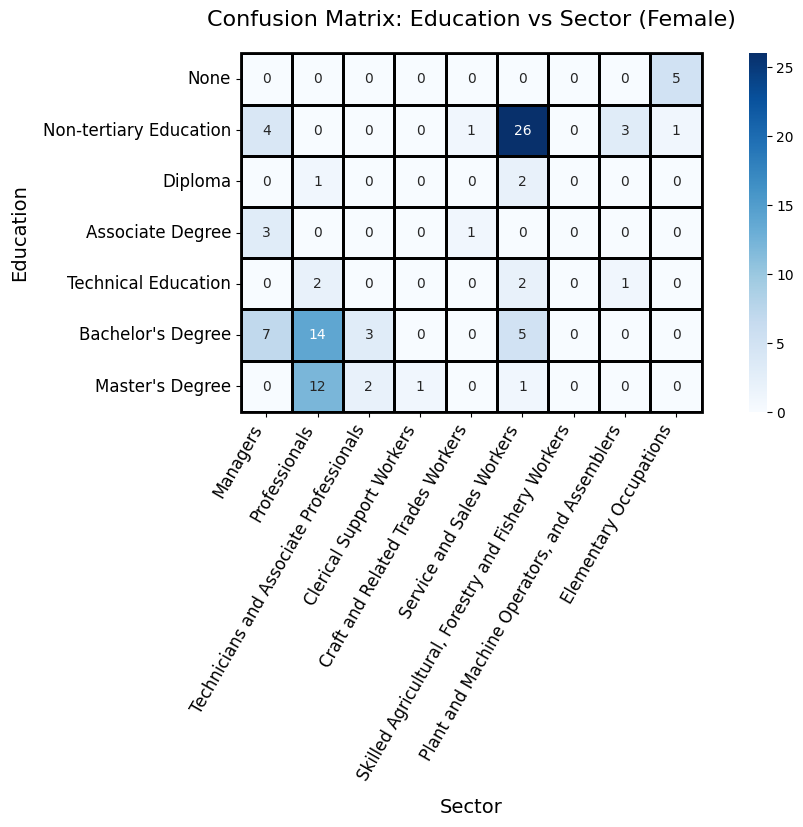

In [43]:
from scipy.stats import chi2_contingency
import seaborn as sns
import statsmodels.api as sm

df = pd.concat([dfs[dataset][model].assign(model=model) for model in models], ignore_index=True)
df['Sex'] = df['Sex'].apply(sexHelper.sex2standard)
df['Sector'] = df['Employment'].apply(jobHelper.employment2sector)
df['Education'] = df['Education'].apply(jobHelper.education2certification)


df_2 = df[df['Sex']=='Female']

sector_order = [
    "Managers", "Professionals", "Technicians and Associate Professionals", "Clerical Support Workers",
    "Craft and Related Trades Workers", "Service and Sales Workers", "Skilled Agricultural, Forestry and Fishery Workers",
    "Plant and Machine Operators, and Assemblers", "Elementary Occupations", "Unemployed"
]

educ_order = [
    "None","Non-tertiary Education",
    "Diploma","Associate Degree","Technical Education",
    "Bachelor's Degree","Master's Degree", "Ph.D / Doctor",
]

# Generate the cross-tabulation
confusion_matrix = pd.crosstab(
    df_2['Education'],
    df_2['Sector'],
    margins=True
).reindex(index=educ_order, columns=sector_order, fill_value=0)

# Plot the confusion matrix with enhanced styling
plt.figure(figsize=(12, 8))

# Create the heatmap with borders
sns.heatmap(
    confusion_matrix.iloc[:-1, :-1],
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=True,
    linewidths=1,  # Add borders between cells
    linecolor='black',  # Border color
    square=True  # Make cells square for better appearance
)

# Add a dark border around the entire heatmap
plt.gca().patch.set_edgecolor('black')  
plt.gca().patch.set_linewidth(2)

# Improve title and axis labels with better formatting
plt.title("Confusion Matrix: Education vs Sector (Female)", fontsize=16, pad=20)
plt.xlabel("Sector", fontsize=14, labelpad=10)
plt.ylabel("Education", fontsize=14, labelpad=10)

# Format the tick labels
plt.xticks(rotation=60, ha="right", fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Add a bit more space around the plot
plt.tight_layout()

plt.show()

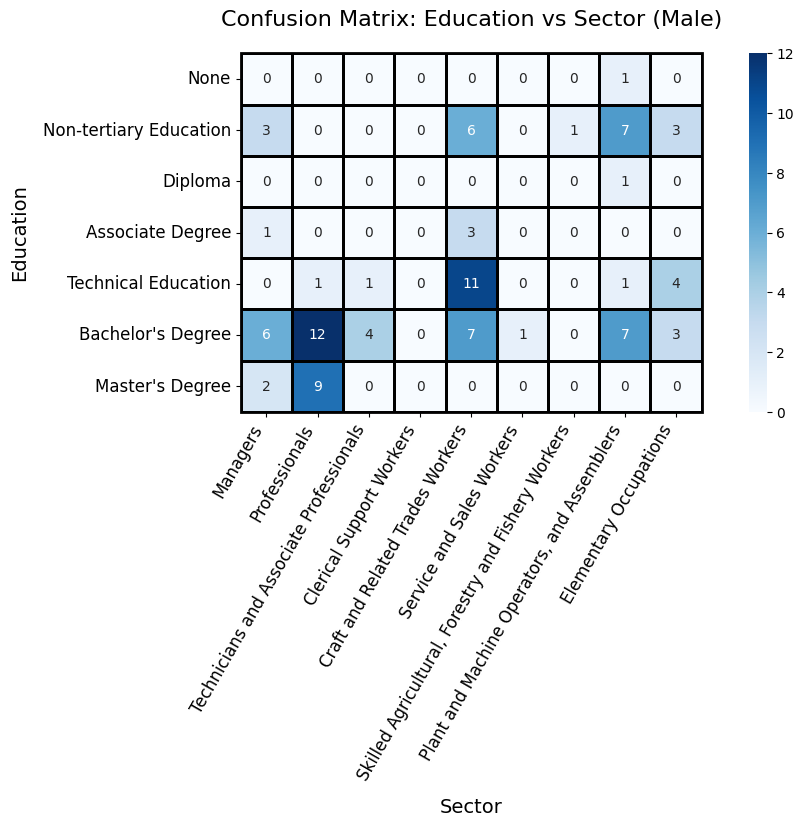

In [45]:

df_2 = df[df['Sex']=='Male']

sector_order = [
    "Managers", "Professionals", "Technicians and Associate Professionals", "Clerical Support Workers",
    "Craft and Related Trades Workers", "Service and Sales Workers", "Skilled Agricultural, Forestry and Fishery Workers",
    "Plant and Machine Operators, and Assemblers", "Elementary Occupations", "Unemployed"
]

educ_order = [
    "None","Non-tertiary Education",
    "Diploma","Associate Degree","Technical Education",
    "Bachelor's Degree","Master's Degree", "Ph.D / Doctor",
]

# Generate the cross-tabulation
confusion_matrix = pd.crosstab(
    df_2['Education'],
    df_2['Sector'],
    margins=True
).reindex(index=educ_order, columns=sector_order, fill_value=0)

# Plot the confusion matrix with enhanced styling
plt.figure(figsize=(12, 8))

# Create the heatmap with borders
sns.heatmap(
    confusion_matrix.iloc[:-1, :-1],
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=True,
    linewidths=1,  # Add borders between cells
    linecolor='black',  # Border color
    square=True  # Make cells square for better appearance
)

# Add a dark border around the entire heatmap
plt.gca().patch.set_edgecolor('black')  
plt.gca().patch.set_linewidth(2)

# Improve title and axis labels with better formatting
plt.title("Confusion Matrix: Education vs Sector (Male)", fontsize=16, pad=20)
plt.xlabel("Sector", fontsize=14, labelpad=10)
plt.ylabel("Education", fontsize=14, labelpad=10)

# Format the tick labels
plt.xticks(rotation=60, ha="right", fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Add a bit more space around the plot
plt.tight_layout()

plt.show()

# [sector_order]

# # 4. Chi-square test for independence
# # Test for sex and employment
# contingency_sex_employment = pd.crosstab(df['Sex'], df['Sector'])
# chi2_sex_emp, p_sex_emp, dof_sex_emp, expected_sex_emp = chi2_contingency(contingency_sex_employment)
# print("\nChi-square test for Sex and Employment:")
# print(f"Chi-square value: {chi2_sex_emp:.4f}")
# print(f"p-value: {p_sex_emp:.4f}")
# print(f"Degrees of freedom: {dof_sex_emp}")

### Gender (Piechart)

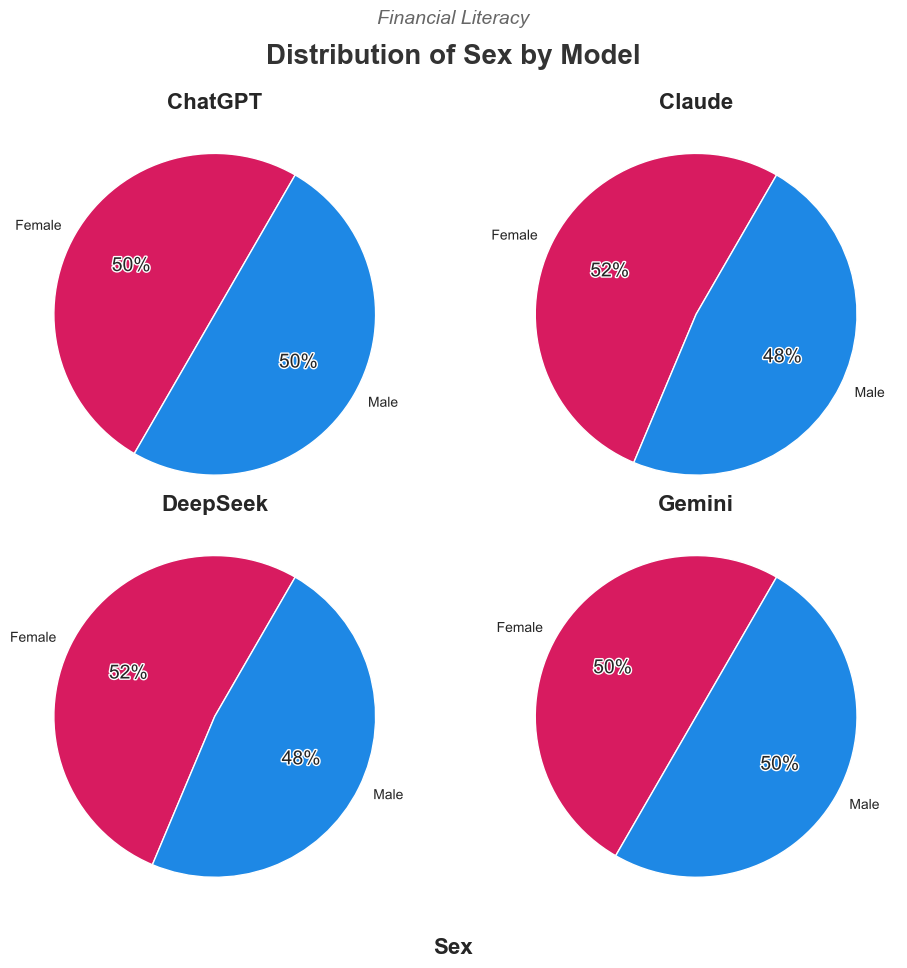

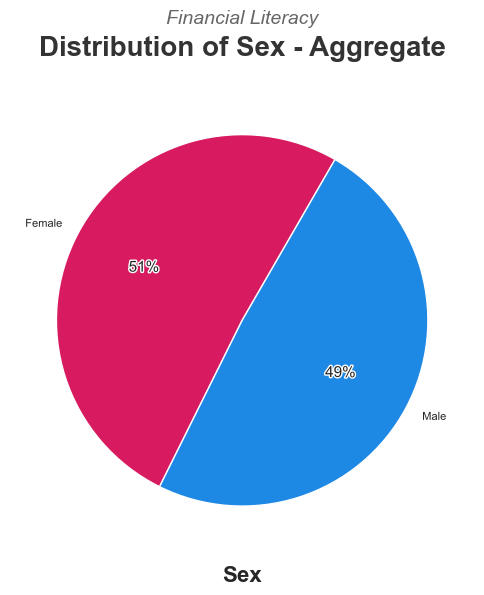

In [5]:
import os
import pandas as pd
from draw import Histogram, Piechart, Map
from helper import CountryHelper,JobHelper, SexHelper

models = ["ChatGPT","Claude","DeepSeek","Gemini"]
case_studies = ["Career Development","Family Health","Financial Literacy","Media Literacy"]
piechart = Piechart(models)
dataset = "Financial Literacy"

dfs = {
    case_study: {
        model:pd.read_csv(os.path.join("Case Studies",case_study,f'{model}.csv'))
        for model in models
    }
    for case_study in case_studies
}

#Make piechart function for each gender's employment/education
jobHelper = JobHelper()
sexHelper = SexHelper()

df = pd.concat([dfs[dataset][model].assign(model=model) for model in models], ignore_index=True)
df['Sex'] = df['Sex'].apply(sexHelper.sex2standard)

plt = piechart.draw(
    df, x="Sex",
    dataset="Financial Literacy",
    aggregate=False, other=0.04,
    text_width=15, rotation=60,
    figsize=(10,10),space=0,
)
plt.savefig(os.path.join('Case Studies',dataset,'data',f"Gender (Piechart)"), dpi=300, bbox_inches='tight')
plt.show()

plt = piechart.draw(
    df, x="Sex",
    dataset=dataset,
    aggregate=True, other=0.04,
    text_width=15, rotation=60,
    figsize=(6,6),space=0,
)
plt.savefig(os.path.join('Case Studies',dataset,'data',f"Gender (Piechart) - Aggregate"), dpi=300, bbox_inches='tight')
plt.show()


### Gender and order of responses (Stacked Bar Chart)

c:\Users\Owner\Desktop\gender\draw.py:859: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.04, 1, 0.94])


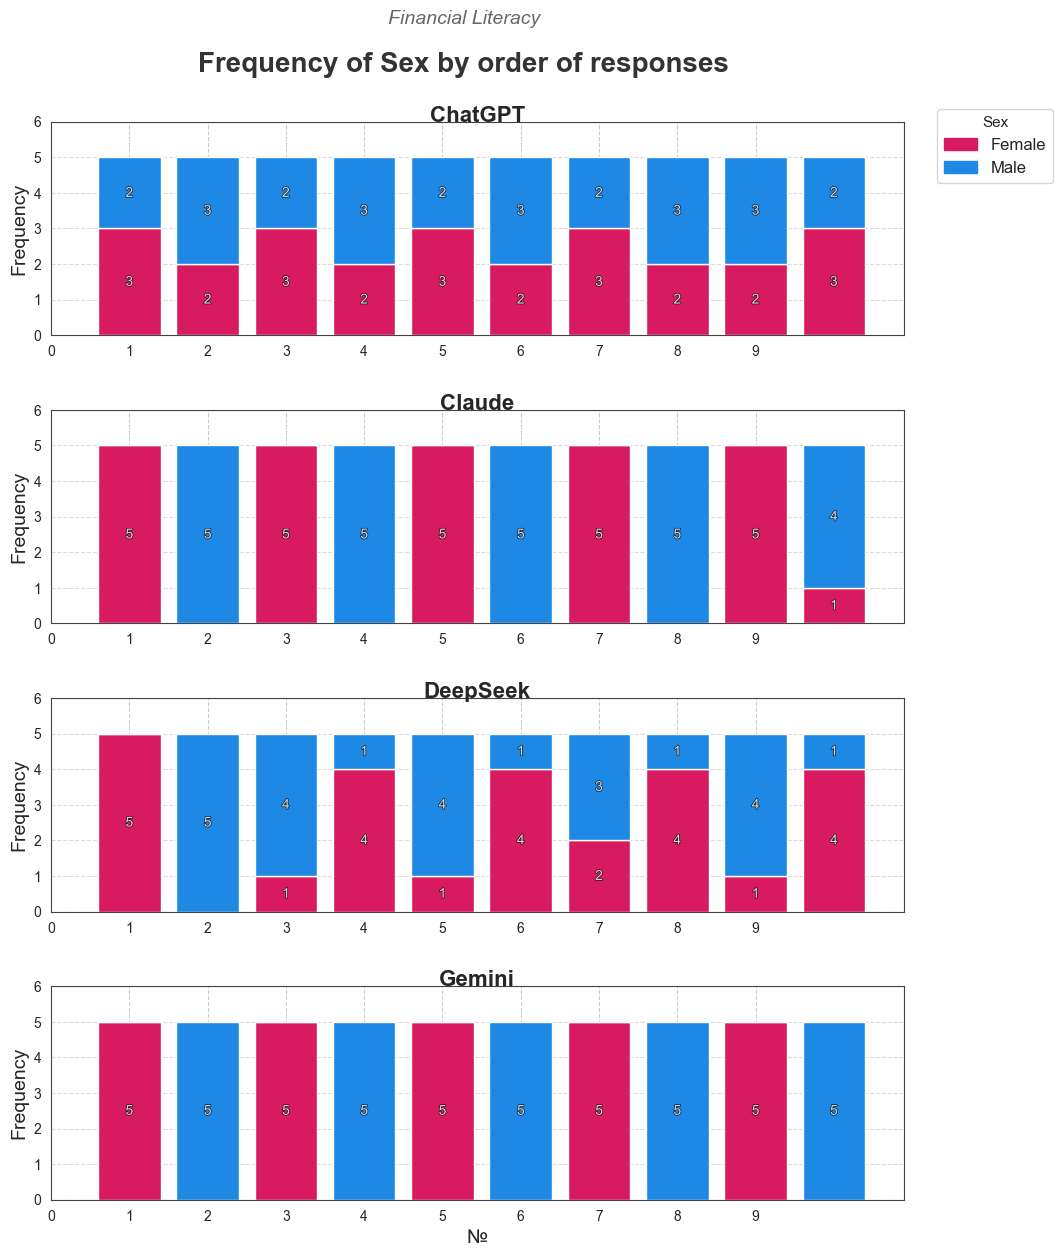

In [15]:
dfs = {
    case_study: {
        model:pd.read_csv(os.path.join("Case Studies",case_study,f'{model}.csv'))
        for model in models
    }
    for case_study in case_studies
}

df = pd.concat([dfs['Financial Literacy'][model].assign(model=model) for model in models], ignore_index=True)
df['Sector'] = df['Employment'].apply(jobHelper.employment2sector)
df['Subsector'] = df['Employment'].apply(jobHelper.employment2subsector)
df['Sex'] = df['Sex'].apply(sexHelper.sex2standard)


plt = stackedBar.draw(
    df=df,x='№',stacked_hue='Sex',
    space=0.35, ylim=6, bar_labels=True,
    figsize=(11,14), grid=True, dataset=dataset # Added dataset for title consistency
)
plt.savefig(os.path.join('Case Studies',dataset,'data',f"Gender and order of responses (Stacked Bar Chart)"), dpi=300, bbox_inches='tight')
plt.show()

### Gender and Employment (Stacked Bar Chart)

c:\Users\Owner\Desktop\gender\draw.py:859: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.04, 1, 0.94])


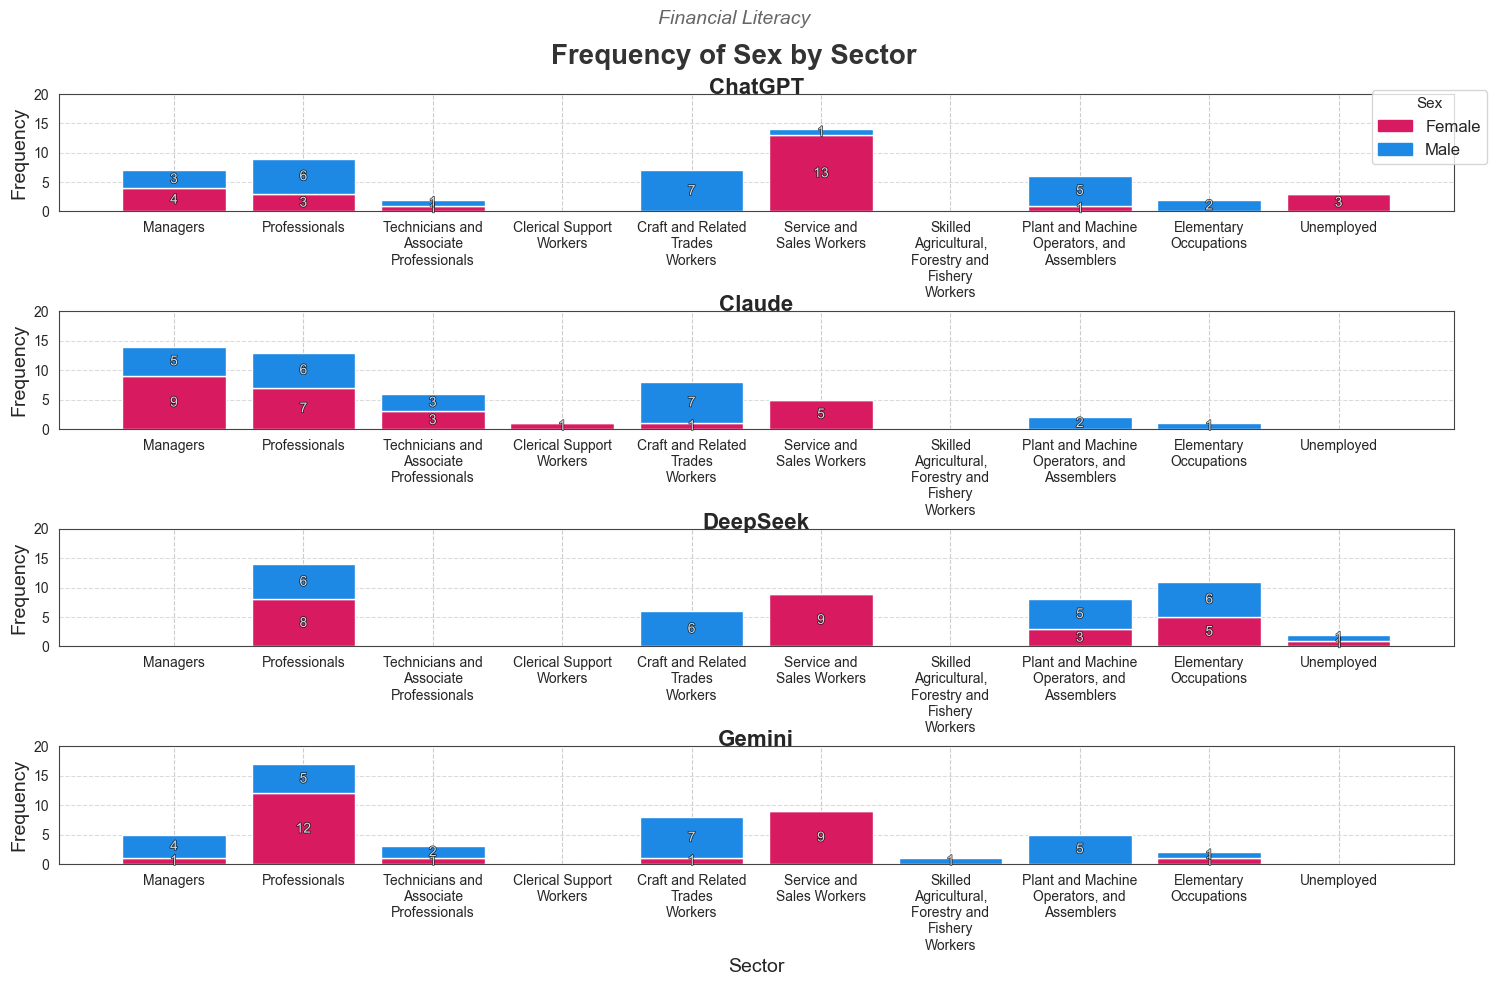

c:\Users\Owner\Desktop\gender\draw.py:859: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.04, 1, 0.94])


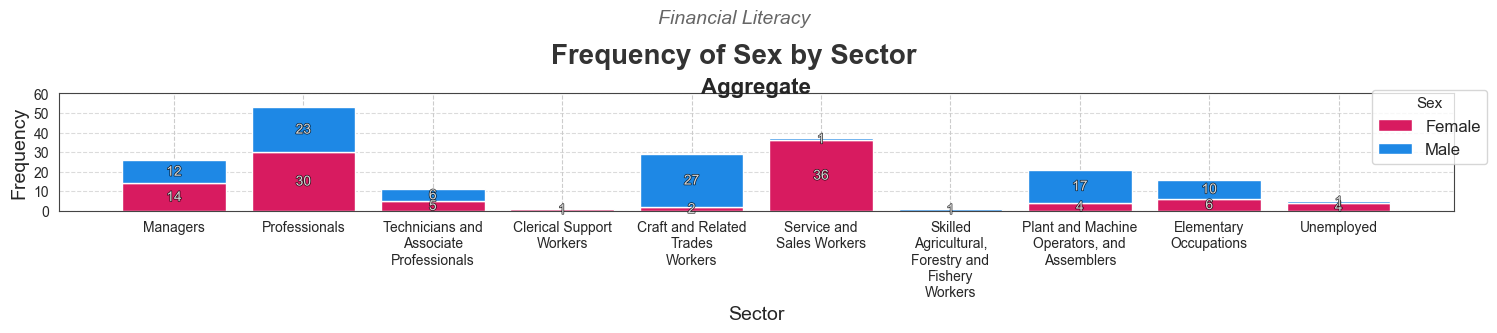

In [ ]:
from draw import squeeze_text
dfs = {
    case_study: {
        model:pd.read_csv(os.path.join("Case Studies",case_study,f'{model}.csv'))
        for model in models
    }
    for case_study in case_studies
}

df = pd.concat([dfs['Financial Literacy'][model].assign(model=model) for model in models], ignore_index=True)
df['Sector']    = df['Employment'].apply(jobHelper.employment2sector)   
df['Subsector'] = df['Employment'].apply(jobHelper.employment2subsector)
df['Sex'] = df['Sex'].apply(sexHelper.sex2standard)

plt = stackedBar.draw(
    df=df,x='Sector',stacked_hue='Sex', grid=True,
    space=0.85, ylim=20, ystep=5,bar_labels=True,
    txt_width=15, figsize=(18,10), dataset=dataset # Added dataset for title consistency
)
plt.savefig(os.path.join('Case Studies',dataset,'data',f"Gender and Employment (Stacked Bar Chart)"), dpi=300, bbox_inches='tight')
plt.show()


plt = stackedBar.draw(
    df=df,x='Sector',stacked_hue='Sex', grid=True, 
    space=0.85, ylim=60, ystep=10, bar_labels=True,
    txt_width=15, figsize=(18,10), aggregate=True, dataset=dataset # Added dataset for title consistency
)
plt.savefig(os.path.join('Case Studies',dataset,'data',f"Gender and Employment (Stacked Bar Chart) - Aggregate"), dpi=300, bbox_inches='tight')
plt.show()


### Gender and Education (Stacked Bar Chart)

high school high school high school high school diploma secondary education high school diploma high school high school high school high school high school primary school high school high school high school high school diploma high school equivalent primary school education high school diploma high school diploma from mexico high school equivalent from haiti high school diploma high school equivalent high school diploma from mexico high school diploma high school diploma high school diploma high school diploma high school diploma high school diploma high school diploma high school diploma high school diploma high school diploma middle school high school diploma high school diploma high school diploma high school diploma high school diploma high school diploma some high school high school diploma high school diploma some high school high school diploma high school diploma high school diploma some high school high school diploma high school diploma some high school high school diploma hi

c:\Users\Gabriel_Freeze\Desktop\gender\draw.py:859: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.04, 1, 0.94])


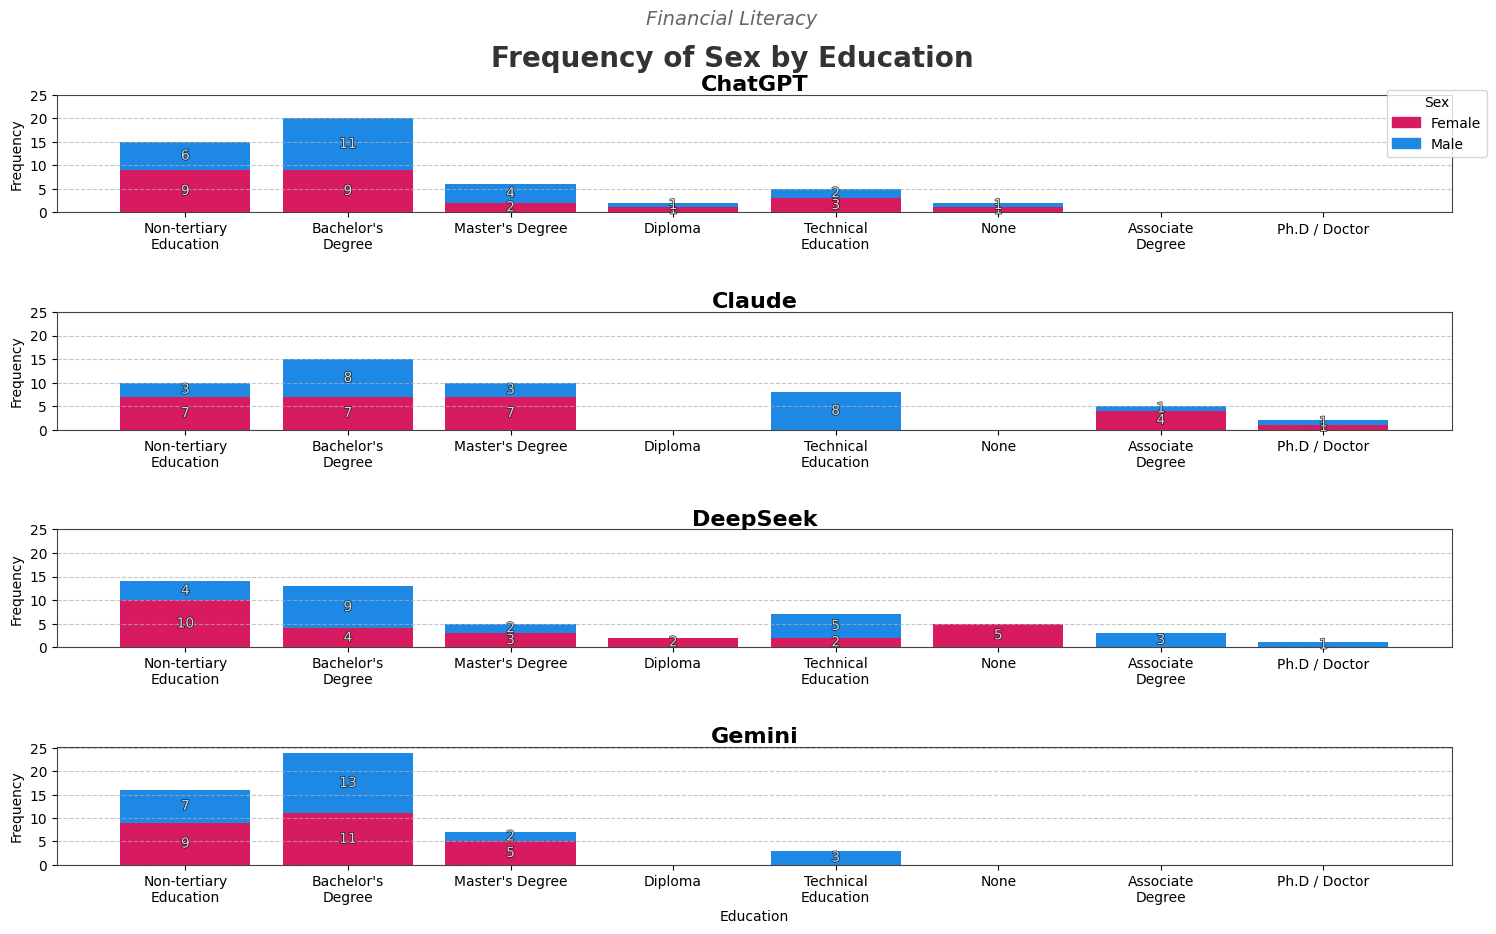

c:\Users\Gabriel_Freeze\Desktop\gender\draw.py:859: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.04, 1, 0.94])


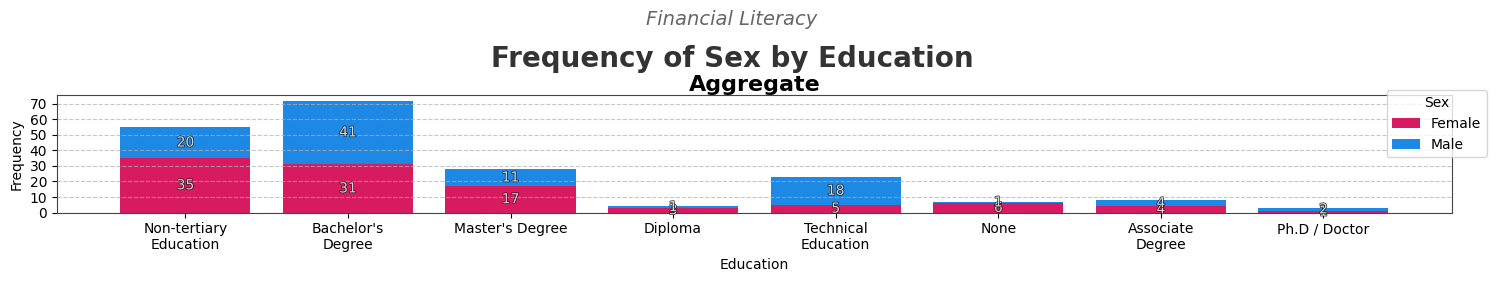

In [ ]:
from draw import squeeze_text

dfs = {
    case_study: {
        model: pd.read_csv(os.path.join("Case Studies", case_study, f'{model}.csv'))
        for model in models
    }
    for case_study in case_studies
}

df = pd.concat([dfs[dataset][model].assign(model=model) for model in models], ignore_index=True)
df['Education'] = df['Education'].apply(jobHelper.education2certification)
df['Sex'] = df['Sex'].apply(sexHelper.sex2standard)

plt = stackedBar.draw(
    df=df, x='Education', stacked_hue='Sex', grid=True,
    space=0.85, ylim=25, ystep=5, bar_labels=True,
    txt_width=15, figsize=(18,10), dataset=dataset
)
plt.savefig(os.path.join('Case Studies', dataset, 'data', f"Gender and Education (Stacked Bar Chart)"), dpi=300, bbox_inches='tight')
plt.show()

plt = stackedBar.draw(
    df=df, x='Education', stacked_hue='Sex', grid=True,
    space=0.85, ylim=70, ystep=10, bar_labels=True,
    txt_width=15, figsize=(18,10), aggregate=True, dataset=dataset
)
plt.savefig(os.path.join('Case Studies', dataset, 'data', f"Gender and Education (Stacked Bar Chart) - Aggregate"), dpi=300, bbox_inches='tight')
plt.show()


### Gender and Age (Population Pyramid)

c:\Users\Owner\Desktop\gender\draw.py:572: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby([stacked_hue, x,hue]).size().reset_index(name='count')
c:\Users\Owner\Desktop\gender\draw.py:610: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(x)[y].sum().reindex(xlabels, fill_value=0)
c:\Users\Owner\Desktop\gender\draw.py:612: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(x)[y].sum().reindex(xlabe

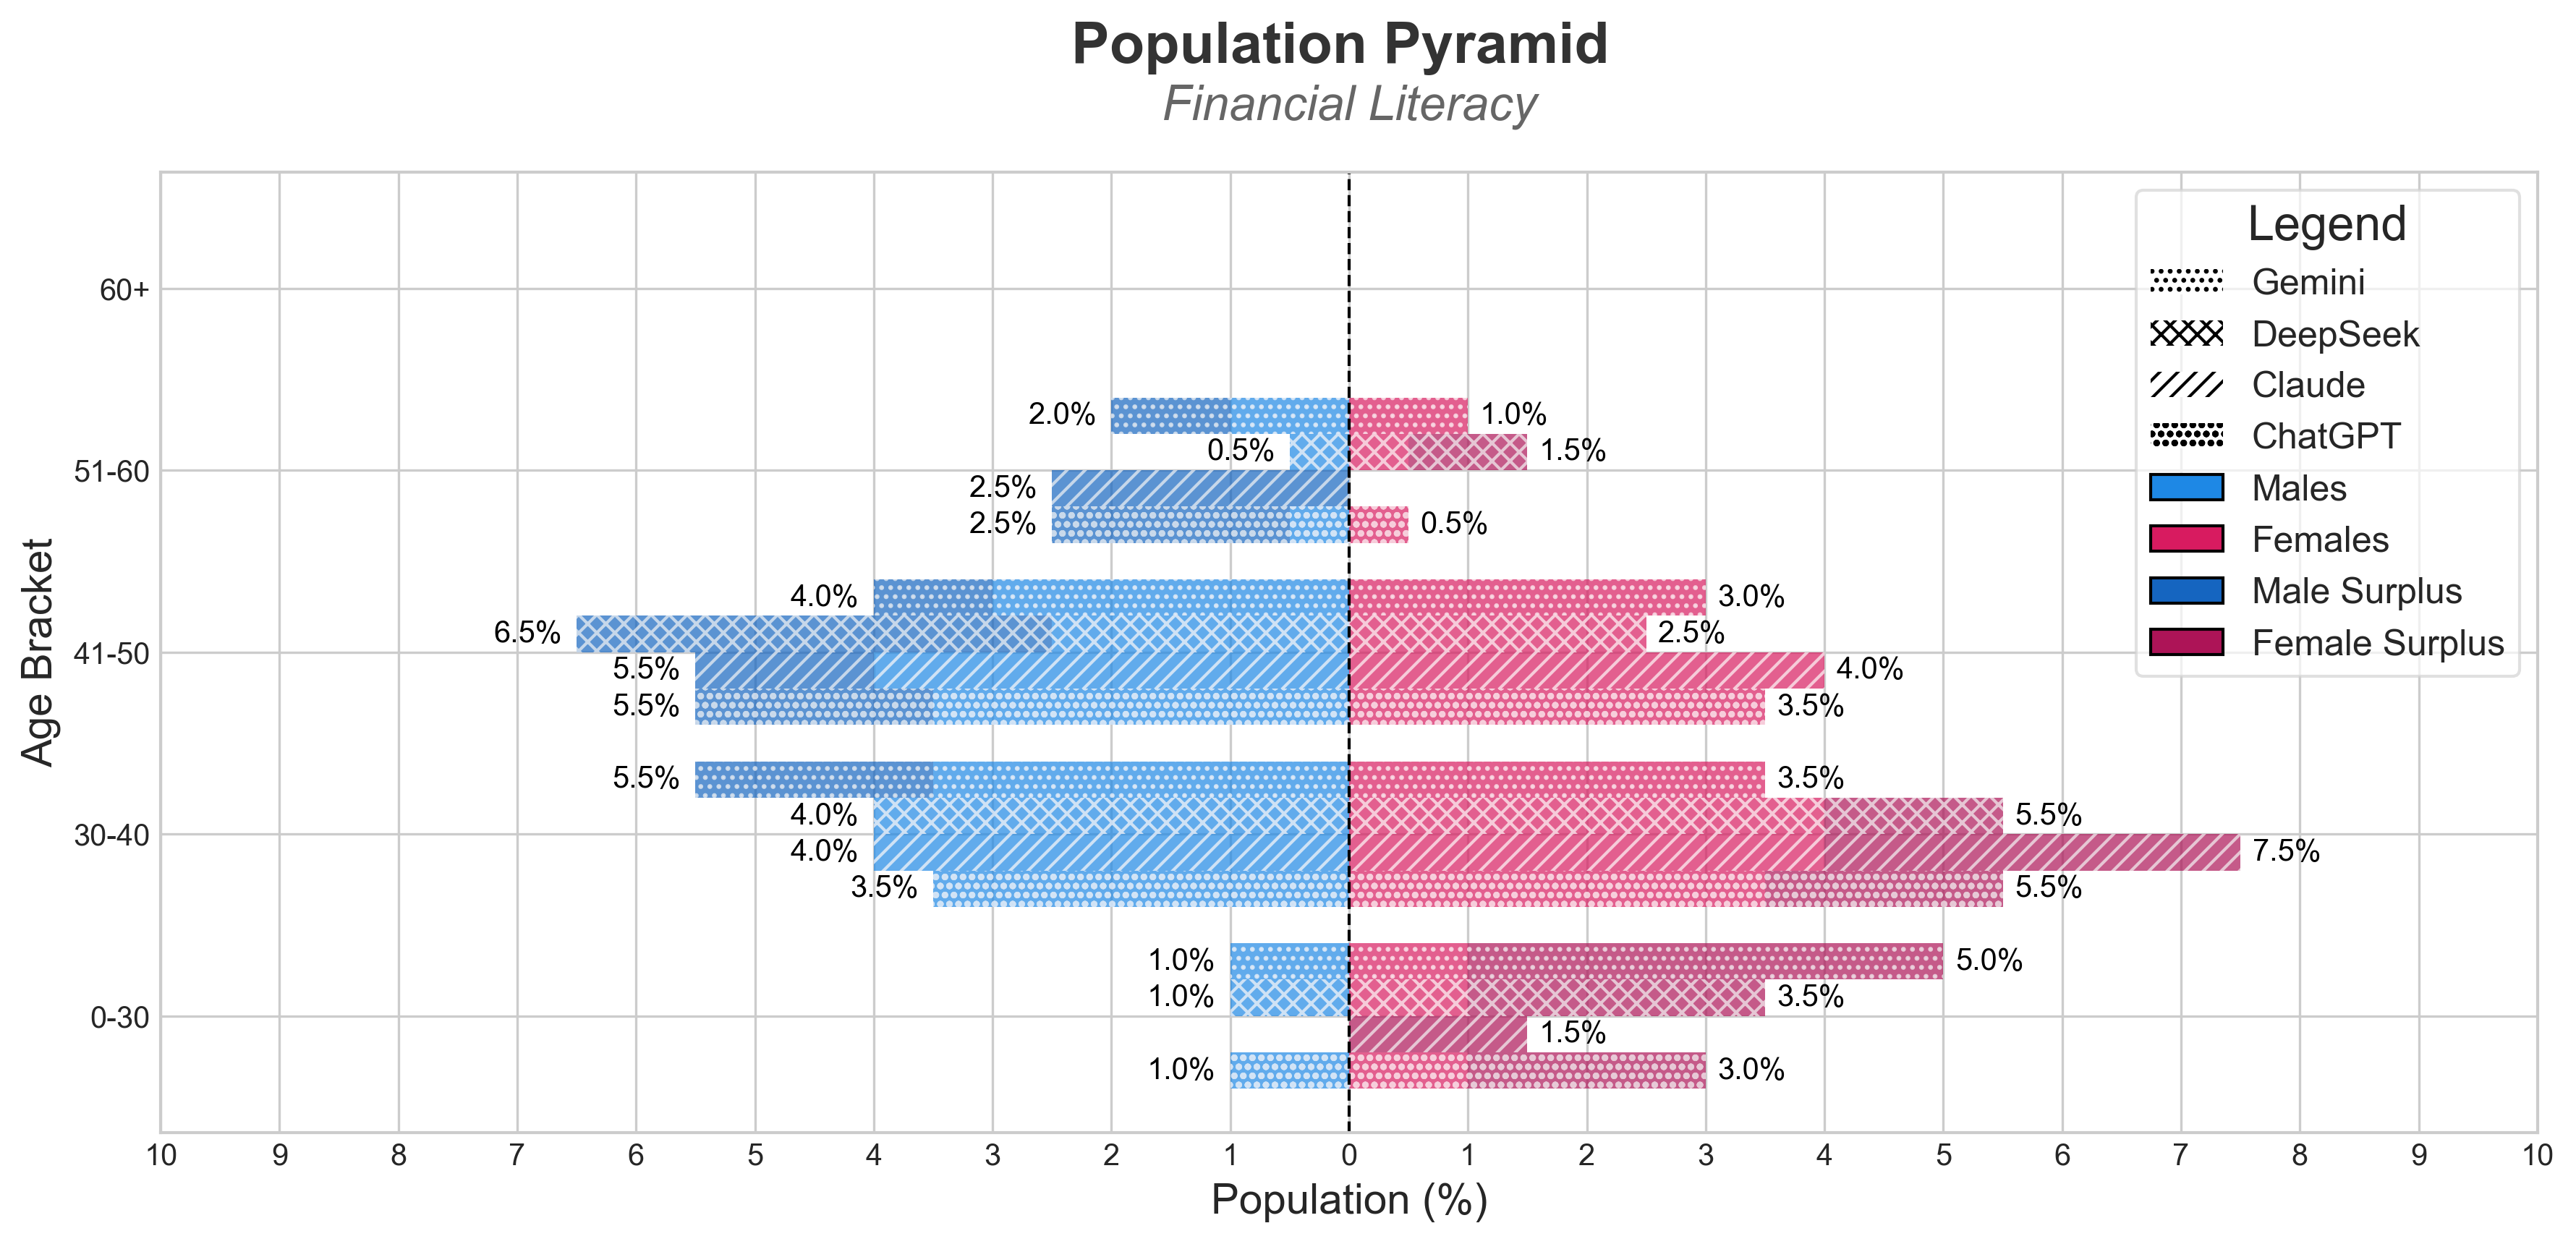

c:\Users\Owner\Desktop\gender\draw.py:572: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby([stacked_hue, x,hue]).size().reset_index(name='count')
c:\Users\Owner\Desktop\gender\draw.py:579: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  males   = df[df[stacked_hue] == 'Male'  ].groupby(x)[y].sum().reindex(xlabels, fill_value=0)
c:\Users\Owner\Desktop\gender\draw.py:580: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warn

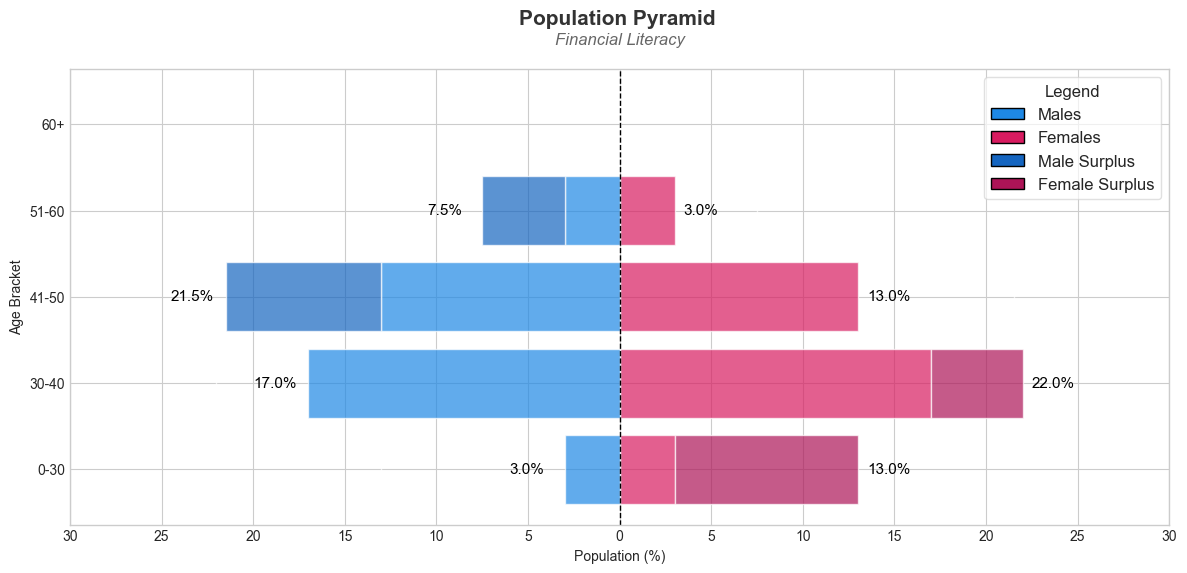

In [17]:
dfs = {
    case_study: {
        model:pd.read_csv(os.path.join("Case Studies",case_study,f'{model}.csv'))
        for model in models
    }
    for case_study in case_studies
}
df = pd.concat([dfs['Financial Literacy'][model].assign(model=model) for model in models], ignore_index=True)
df['Sex'] = df['Sex'].apply(sexHelper.sex2standard)


xlabels = ['0-30', '30-40', '41-50', '51-60', '60+']
df['Age Bracket'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, 100], labels=xlabels)

from draw import PopulationPyramid
pPyramid = PopulationPyramid(models=models)

plt = pPyramid.draw(
    df=df,x='Age Bracket',stacked_hue='Sex',dataset='Financial Literacy',
    xlabels=xlabels,aggregate=False, fontsize=14, figsize=(12,6)
)
plt.savefig(os.path.join('Case Studies',dataset,'data',f"Gender and Age (Population Pyramid)"), dpi=300, bbox_inches='tight')
plt.show()

plt = pPyramid.draw(
    df=df,x='Age Bracket',stacked_hue='Sex',dataset='Financial Literacy',
    xlabels=xlabels,aggregate=True, xlim=30, xstep=5, figsize=(12,6)
)
plt.savefig(os.path.join('Case Studies',dataset,'data',f"Gender and Age (Population Pyramid) - Aggregate"), dpi=300, bbox_inches='tight')
plt.show()

